## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Upload required libraries

In [1]:
# import required libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

### Import Data


In [2]:
data = pd.read_excel('Election_Data.xlsx', sheet_name='Sheet1')
data

**Data Dictionary**
0      1. vote: Party choice: Conservative or Labour
1                                   2. age: in years
2  3. economic.cond.national: Assessment of curre...
3  4. economic.cond.household: Assessment of curr...
4  5. Blair: Assessment of the Labour leader, 1 t...
5  6. Hague: Assessment of the Conservative leade...
6  7. Europe: an 11-point scale that measures res...
7  8. political.knowledge: Knowledge of parties' ...
8                         9. gender: female or male.

In [3]:
# read Election data set into a variable dataframe 
df = pd.read_excel('Election_Data.xlsx', sheet_name="Election_Dataset_Two Classes")

In [4]:
df.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
df.shape

(1525, 10)

In [7]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [9]:
df.skew()

Unnamed: 0                 0.000000
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [10]:
df.describe().T

count        mean         std   min    25%    50%  \
Unnamed: 0               1525.0  763.000000  440.373894   1.0  382.0  763.0   
age                      1525.0   54.182295   15.711209  24.0   41.0   53.0   
economic.cond.national   1525.0    3.245902    0.880969   1.0    3.0    3.0   
economic.cond.household  1525.0    3.140328    0.929951   1.0    3.0    3.0   
Blair                    1525.0    3.334426    1.174824   1.0    2.0    4.0   
Hague                    1525.0    2.746885    1.230703   1.0    2.0    2.0   
Europe                   1525.0    6.728525    3.297538   1.0    4.0    6.0   
political.knowledge      1525.0    1.542295    1.083315   0.0    0.0    2.0   

                            75%     max  
Unnamed: 0               1144.0  1525.0  
age                        67.0    93.0  
economic.cond.national      4.0     5.0  
economic.cond.household     4.0     5.0  
Blair                       4.0     5.0  
Hague                       4.0     5.0  
Europe                     10.0    11.0  
political.knowledge         2.0     3.0

* Vote and age variable have 2 unique values
* Vote : Conservative and Labour
* Labour count is 1057 which is more than conservative count of 460
* Gender: Male and Female
* Female voters are more than male voters
* age is continuous variable
* Min age of voters is 24
* Max age of voters is 93
* Average age of voters is 54
* Maximum Assessment of current national economic conditions is 5
* Average Assessment of current household economic conditions is 3

### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

## EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [12]:
df.shape

(1525, 10)

### Null Check Value

In [13]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

There are no missing data . column 0 "Unnamed" is a serial number which need to be drop from the dataset.

### Drop unnamed column

In [14]:
df = df.drop(labels='Unnamed: 0', axis=1)

### Check for duplicate value

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(1517, 9)

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




 ### Need to standard column names, remove dots between column names

In [18]:
Dictionary = {'economic.cond.national': 'economic_cond_national', 'economic.cond.household': 'economic_cond_household',
             'political.knowledge': 'political_knowledge'}

In [19]:
df.rename(columns=Dictionary, inplace= True)

In [20]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   

   Europe  political_knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male

In [21]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic_cond_national   1517.0   3.245221   0.881792   1.0   3.0   3.0   4.0   
economic_cond_household  1517.0   3.137772   0.931069   1.0   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political_knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic_cond_national    5.0  
economic_cond_household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political_knowledge       3.0

 ## Univariate analysis

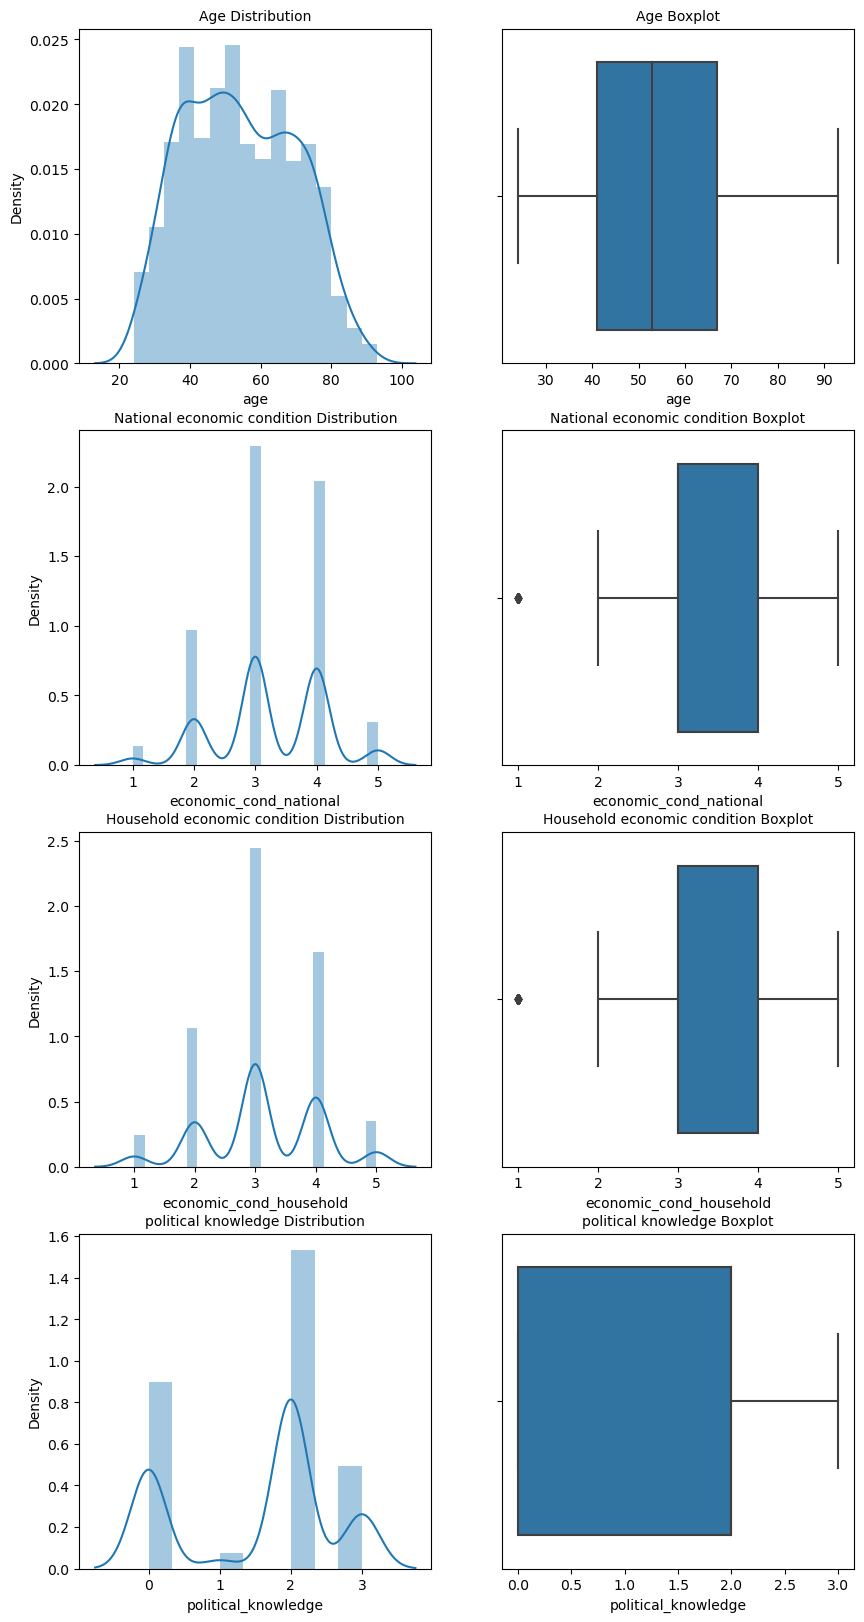

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(df['economic_cond_national'] , ax=axes[1][0])
a.set_title("National economic condition Distribution",fontsize=10)

a = sns.boxplot(df['economic_cond_national'] , orient = "v" , ax=axes[1][1])
a.set_title("National economic condition Boxplot",fontsize=10)


a = sns.distplot(df['economic_cond_household'] , ax=axes[2][0])
a.set_title("Household economic condition Distribution",fontsize=10)

a = sns.boxplot(df['economic_cond_household'] , orient = "v" , ax=axes[2][1])
a.set_title("Household economic condition Boxplot",fontsize=10)


a = sns.distplot(df['political_knowledge'] , ax=axes[3][0])
a.set_title("political knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political_knowledge'] , orient = "v" , ax=axes[3][1])
a.set_title("political knowledge Boxplot",fontsize=10)

plt.show()

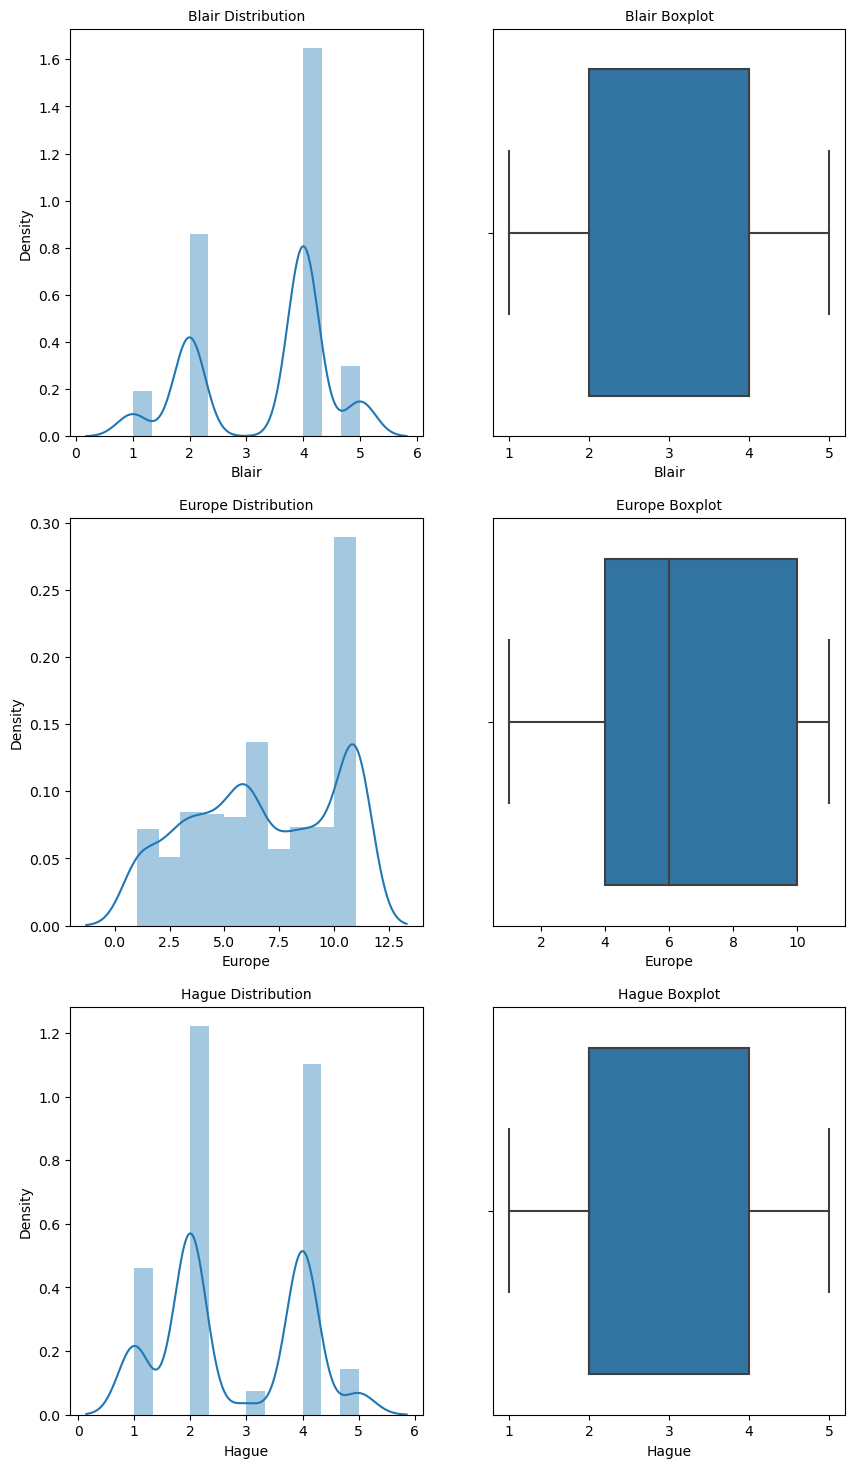

In [23]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(df['Blair'] , ax=axes[0][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[0][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[1][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[2][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[2][1])
a.set_title("Hague Boxplot",fontsize=10)
plt.show()

## Bivariate and Multivariate Analysis

In [24]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

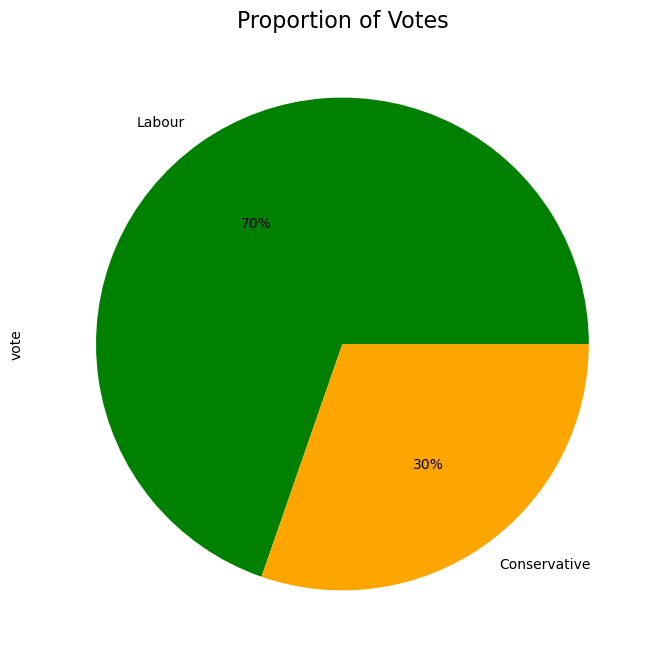

In [25]:
plt.figure(figsize=(8,8))
colors  = ['green', 'orange']
df.vote.value_counts(normalize=True).plot(kind ='pie', autopct ='%1.0f%%', colors = colors)
plt.title('Proportion of Votes', fontsize = 16)
#sns.stripplot(df["vote"], df['economic cond national'], jitter=True) 
plt.show()

In [26]:
df.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

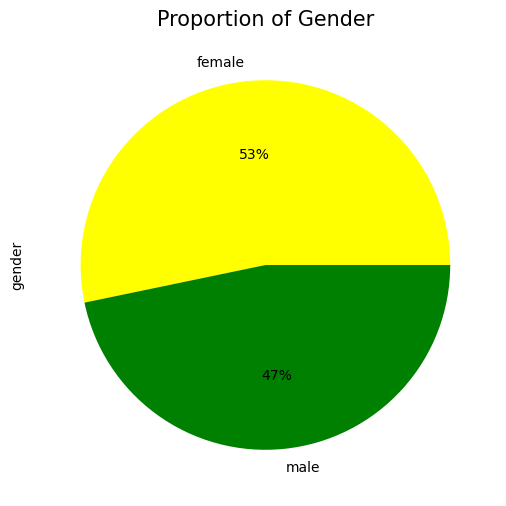

In [27]:
plt.figure(figsize=(6,6))
colors = ['yellow','green']
df.gender.value_counts(normalize=True).plot(kind ='pie', autopct ='%1.0f%%', colors=colors)
plt.title('Proportion of Gender', fontsize = 15)
plt.show()

<Figure size 600x600 with 0 Axes>

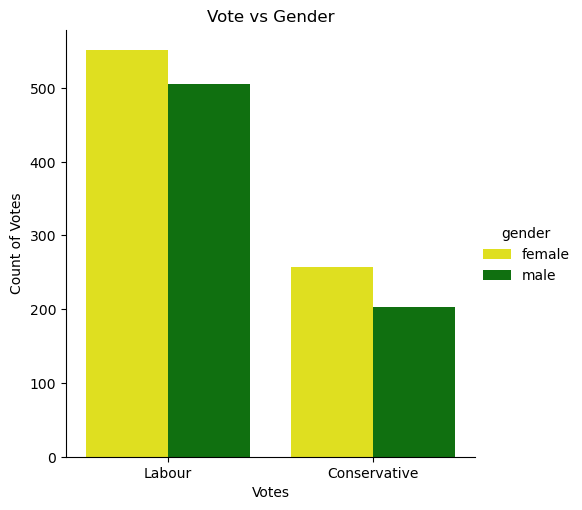

In [28]:
plt.figure(figsize=(6,6))
ax = sns.catplot(x='vote', hue='gender', kind = 'count', data = df, palette=colors)
plt.title('Vote vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes')
plt.show()

In [29]:
df[df.vote=='Labour'].age.mean()

53.10974456007568

In [30]:
df[df.vote=='Conservative'].age.mean()

56.84130434782609

In [31]:
df.economic_cond_national.value_counts(normalize=True)

3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic_cond_national, dtype: float64

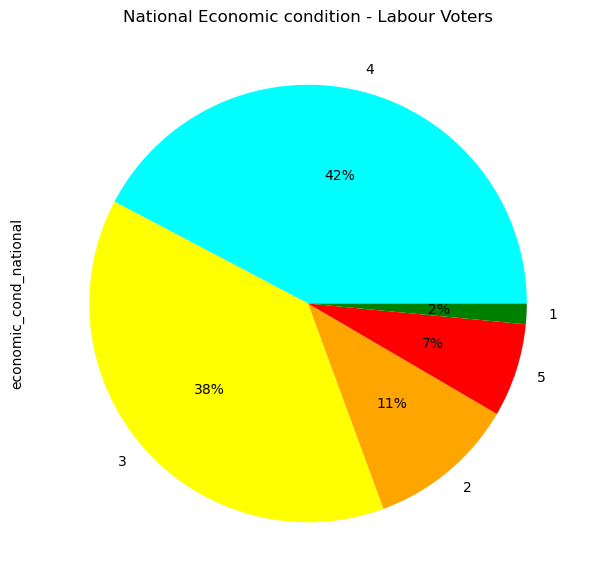

In [32]:
plt.figure(figsize=(6,6))
colors = ['cyan','yellow','orange','red','green']
df[df.vote=='Labour'].economic_cond_national.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',colors=colors)
plt.title('National Economic condition - Labour Voters')
plt.tight_layout()

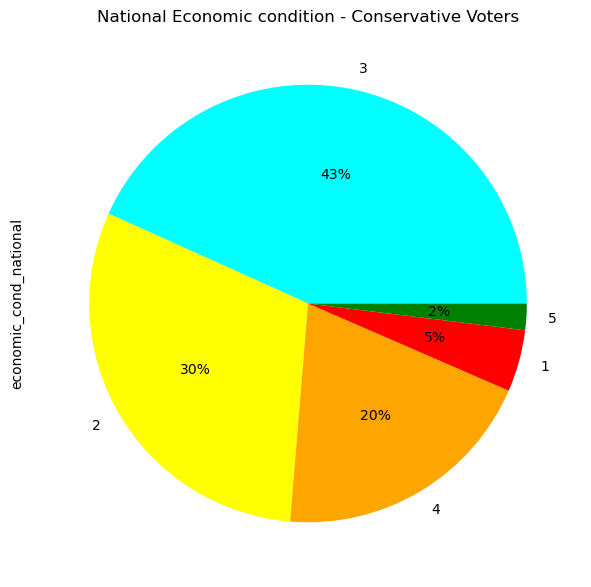

In [33]:
plt.figure(figsize=(6,6))
colors = ['cyan','yellow','orange','red','green']
df[df.vote=='Conservative'].economic_cond_national.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',colors=colors)
plt.title('National Economic condition - Conservative Voters')
plt.tight_layout()

In [34]:
df_grp = df.groupby('vote')

In [35]:
df_grp.economic_cond_national.value_counts()

vote          economic_cond_national
Conservative  3                         199
              2                         140
              4                          91
              1                          21
              5                           9
Labour        4                         447
              3                         405
              2                         116
              5                          73
              1                          16
Name: economic_cond_national, dtype: int64

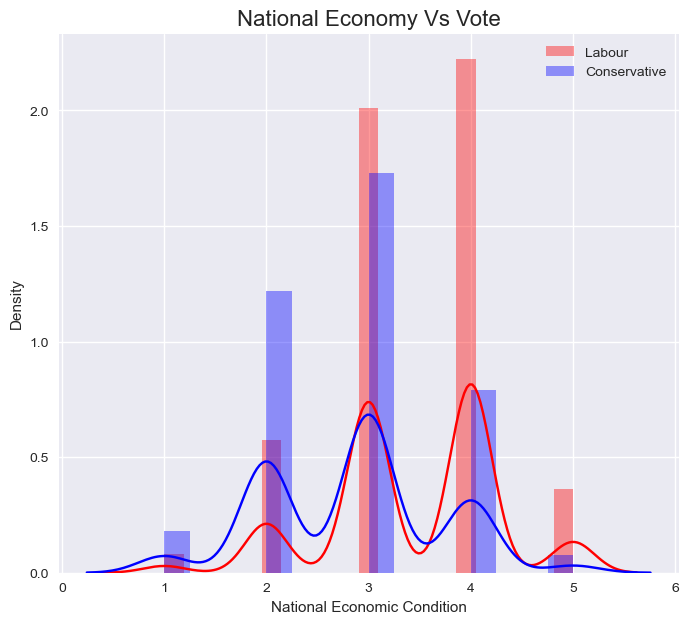

In [36]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour'].economic_cond_national, label = 'Labour',color='red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_national, label ='Conservative',color='blue')
ax.set_title('National Economy Vs Vote', fontsize=16)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol=1)
sns.despine(left=True, bottom=True)
plt.show()



In [37]:
df_grp.economic_cond_household.value_counts()

vote          economic_cond_household
Conservative  3                          197
              2                          126
              4                           86
              1                           28
              5                           23
Labour        3                          448
              4                          349
              2                          154
              5                           69
              1                           37
Name: economic_cond_household, dtype: int64

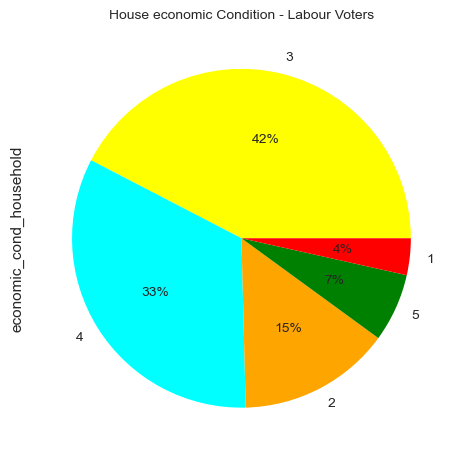

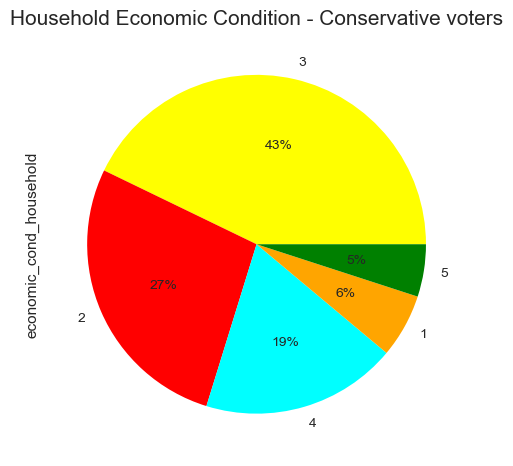

In [38]:
colors = ['yellow','cyan','orange','green','red']
plt.figure(0)
df[df.vote=='Labour'].economic_cond_household.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',colors = colors)
plt.title('House economic Condition - Labour Voters', fontsize = 10)
plt.figure(1)
colors= ['yellow','red','cyan','orange','green']
df[df.vote=='Conservative'].economic_cond_household.value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',colors=colors)
plt.title('Household Economic Condition - Conservative voters' , fontsize=15)
plt.show()

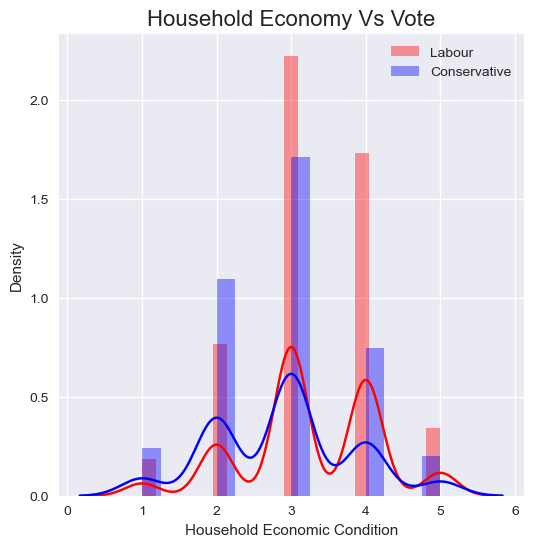

In [39]:
import matplotlib.style
plt.style.use('seaborn')
f,ax = plt.subplots(figsize = (6,6))
sns.distplot(df[df.vote=='Labour'].economic_cond_household,label='Labour',color='red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_household,label='Conservative',color='blue')
ax.set_title('Household Economy Vs Vote',fontsize= 16)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
sns.despine(left= True, bottom= True)
plt.show()

In [40]:
df_grp.Blair.value_counts()

vote          Blair
Conservative  2        240
              4        157
              1         59
              5          3
              3          1
Labour        4        676
              2        194
              5        149
              1         38
Name: Blair, dtype: int64

<AxesSubplot:ylabel='vote,Blair'>

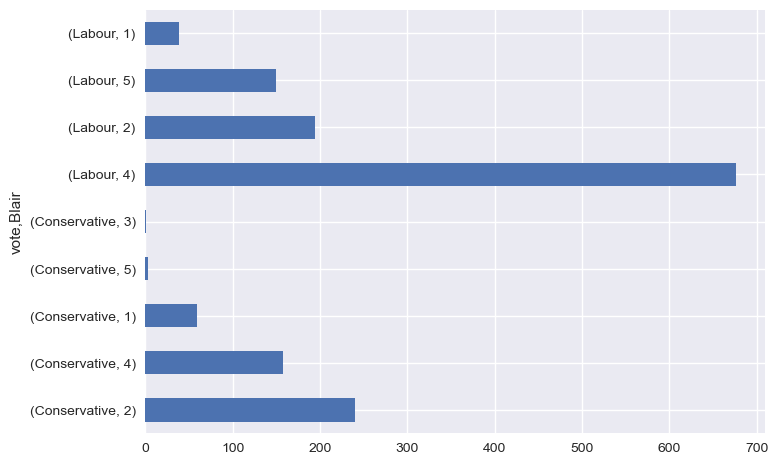

In [41]:
df_grp.Blair.value_counts().plot(kind= 'barh')

In [42]:
df_grp.Hague.value_counts()

vote          Hague
Conservative  4        286
              2         95
              5         59
              1         11
              3          9
Labour        2        522
              4        271
              1        222
              3         28
              5         14
Name: Hague, dtype: int64

<AxesSubplot:ylabel='vote,Hague'>

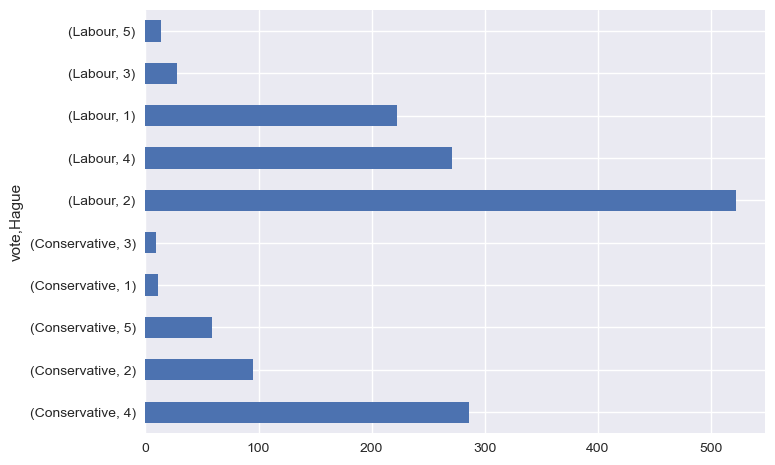

In [43]:
df_grp.Hague.value_counts().plot(kind ='barh')

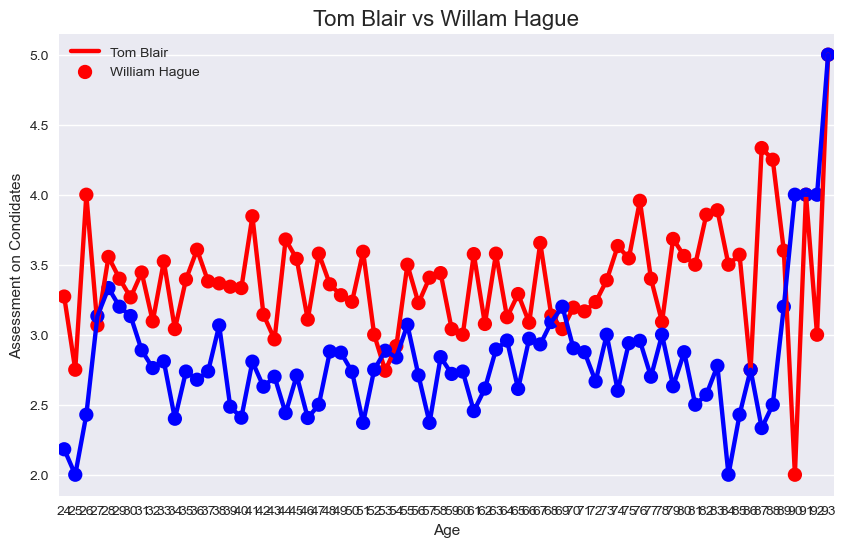

In [44]:
f,ax = plt.subplots(figsize =(10,6))
ax = sns.pointplot(x ='age',y='Blair', data=df , ci = None, color='red', label ='Blair')
ax = sns.pointplot(x='age',y='Hague', data=df,ci= None,color= 'blue',label= 'Hague')
ax.set_xlabel('Age')
ax.set_ylabel('Assessment on Condidates')
plt.title('Tom Blair vs Willam Hague', fontsize =(16))
label =('Tom Blair', 'William Hague')
ax.legend(label, fontsize=10)
plt.show()

In [45]:
df_grp.Europe.value_counts()

vote          Europe
Conservative  11        172
              9          56
              10         54
              8          48
              6          35
              7          32
              5          20
              4          18
              3          14
              2           6
              1           5
Labour        6         172
              11        166
              3         114
              4         108
              1         104
              5         103
              2          71
              8          63
              9          55
              7          54
              10         47
Name: Europe, dtype: int64

<AxesSubplot:ylabel='vote,Europe'>

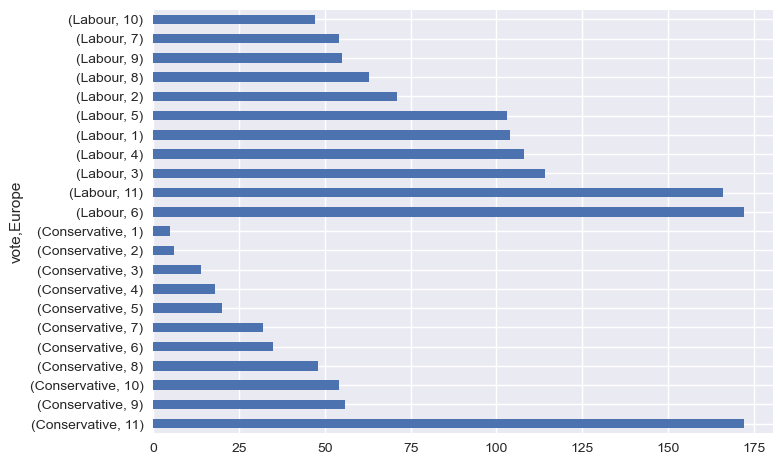

In [46]:
df_grp.Europe.value_counts().plot(kind ='barh')

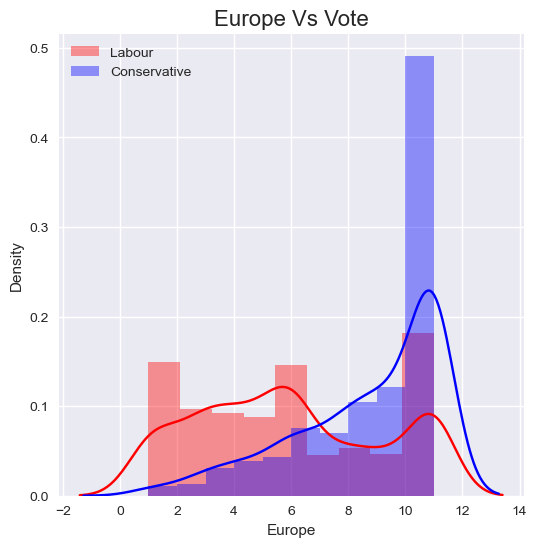

In [47]:
plt.style.use('seaborn')
f,ax = plt.subplots(figsize = (6,6))
sns.distplot(df[df.vote=='Labour'].Europe,label='Labour',color='red')
sns.distplot(df[df.vote=='Conservative'].Europe,label='Conservative',color='blue')
ax.set_title('Europe Vs Vote',fontsize= 16)
ax.set_xlabel('Europe')
ax.legend(ncol = 1)
sns.despine(left= True, bottom= True)
plt.show()

In [48]:
df_grp.political_knowledge.value_counts()

vote          political_knowledge
Conservative  2                      283
              0                       94
              3                       72
              1                       11
Labour        2                      493
              0                      360
              3                      177
              1                       27
Name: political_knowledge, dtype: int64

<AxesSubplot:ylabel='vote,political_knowledge'>

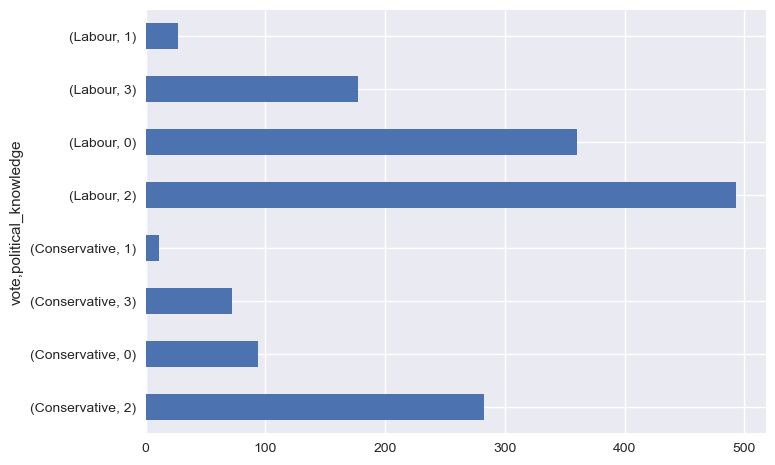

In [49]:
df_grp.political_knowledge.value_counts().plot(kind ='barh')

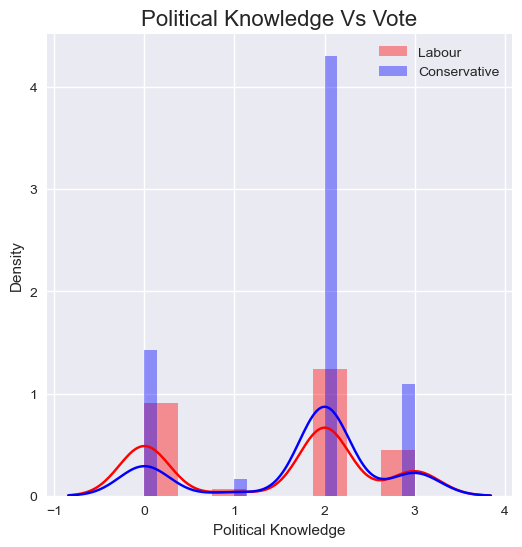

In [50]:
plt.style.use('seaborn')
f,ax = plt.subplots(figsize = (6,6))
sns.distplot(df[df.vote=='Labour'].political_knowledge,label='Labour',color='red')
sns.distplot(df[df.vote=='Conservative'].political_knowledge,label='Conservative',color='blue')
ax.set_title('Political Knowledge Vs Vote',fontsize= 16)
ax.set_xlabel('Political Knowledge')
ax.legend(ncol = 1)
sns.despine(left= True, bottom= True)
plt.show()

<Figure size 800x550 with 0 Axes>

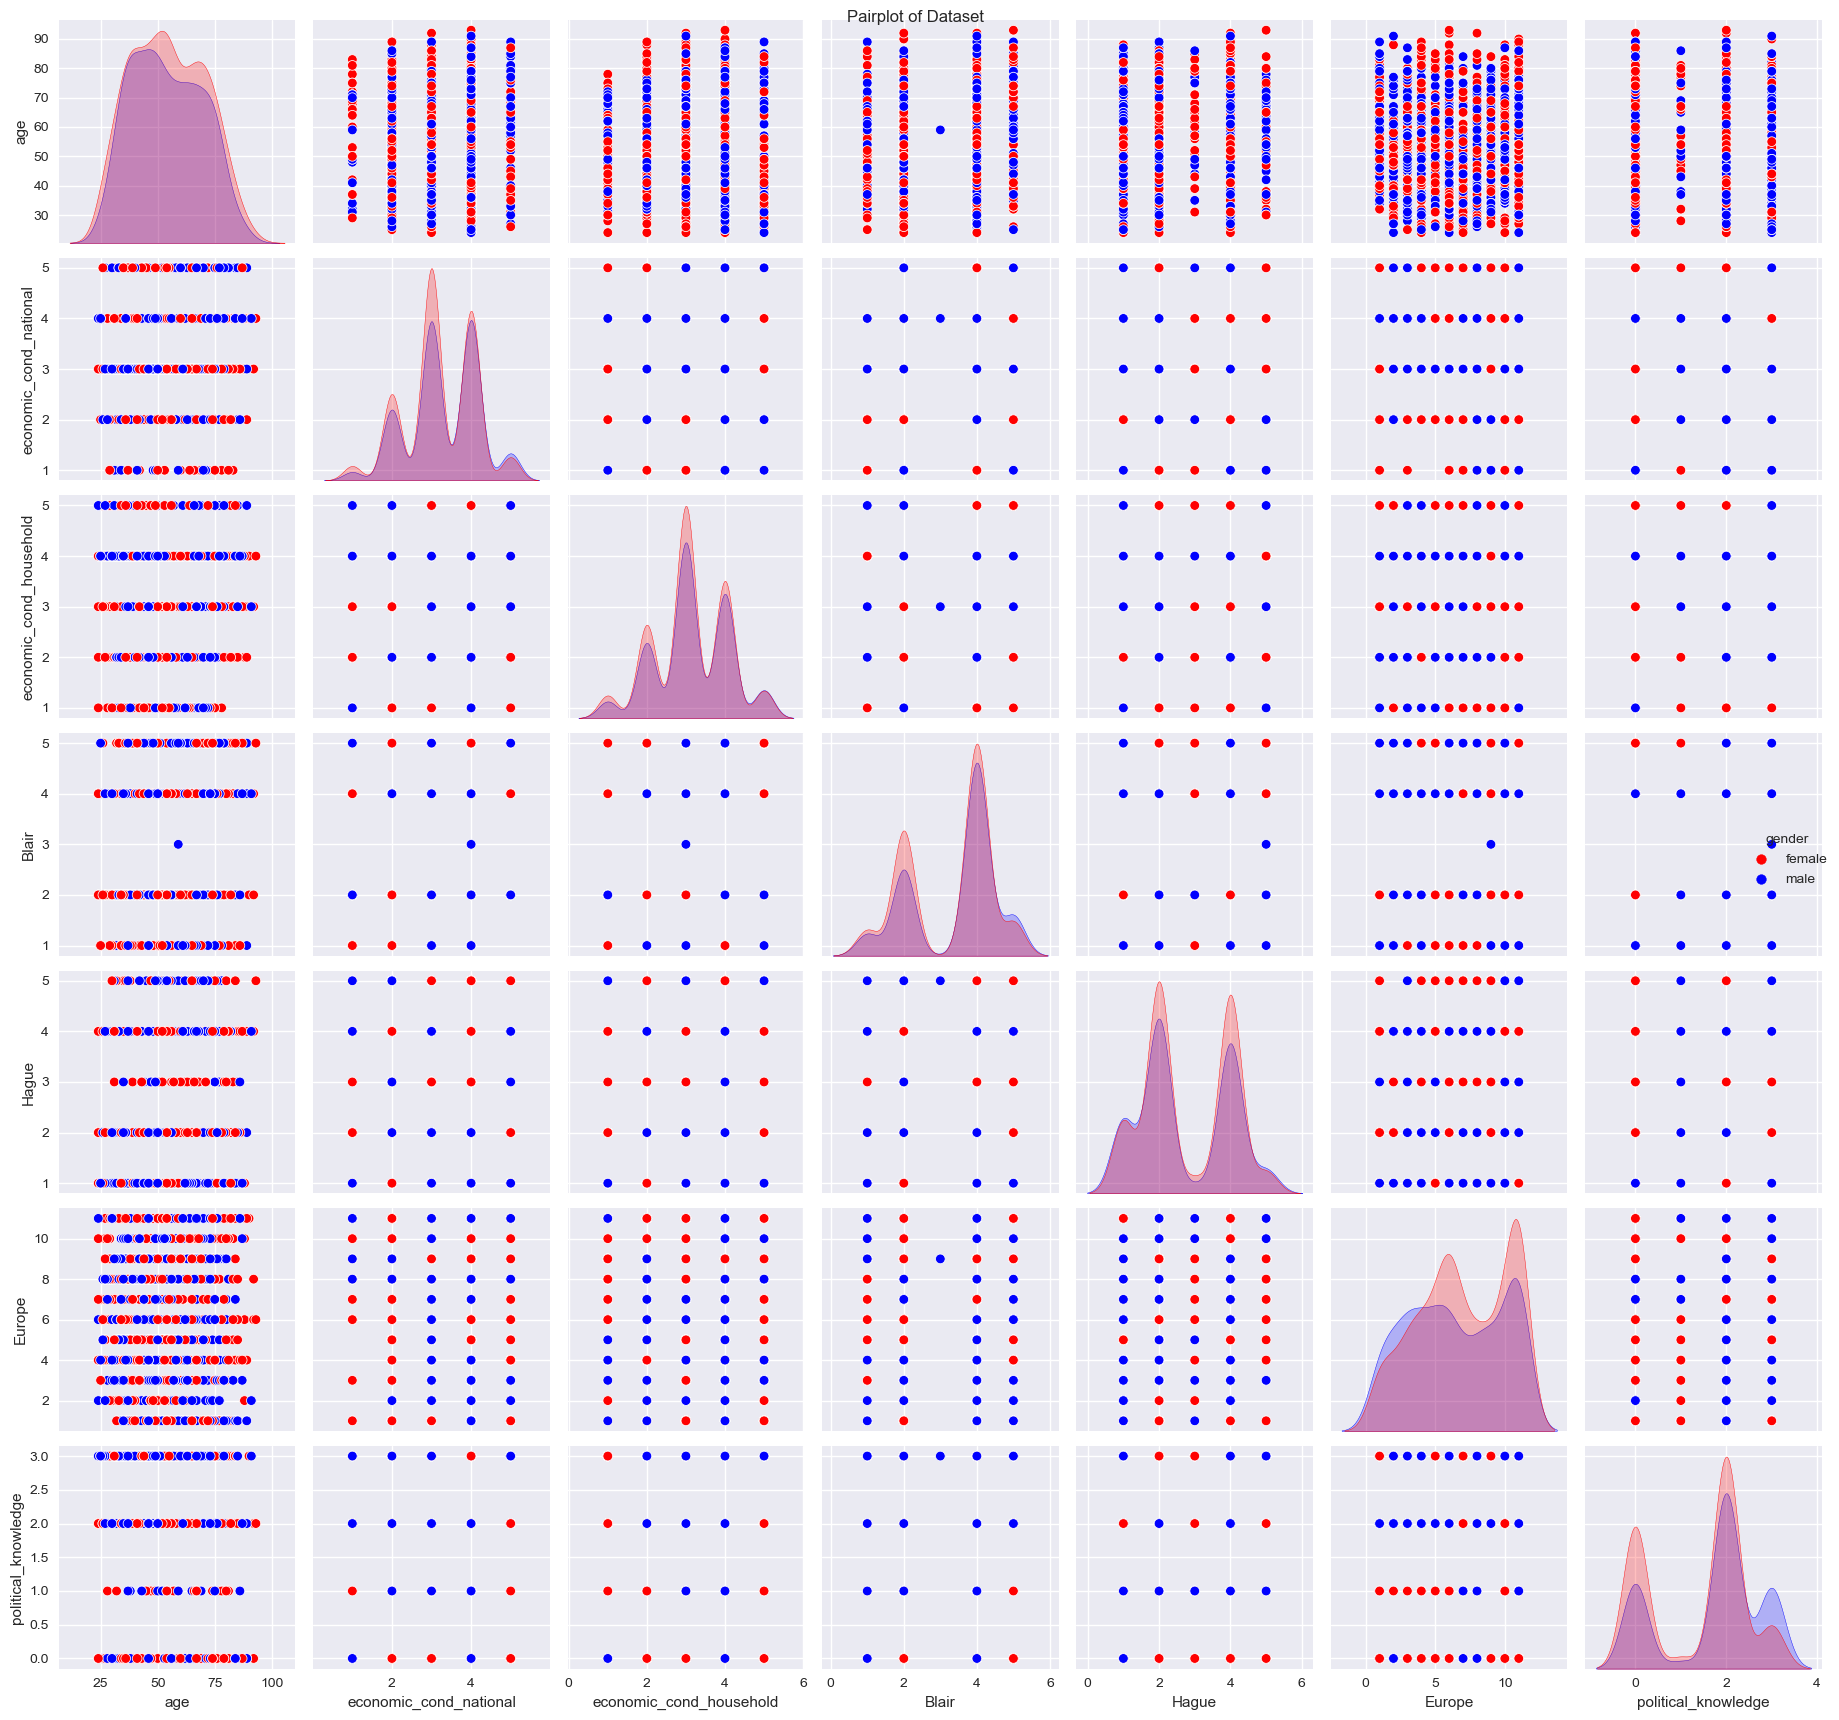

In [51]:
plt.tight_layout()
pairplot =sns.pairplot(df,diag_kind='kde',hue="gender", palette=['red', 'blue'])
pairplot.fig.suptitle('Pairplot of Dataset')
plt.tight_layout()
plt.show()

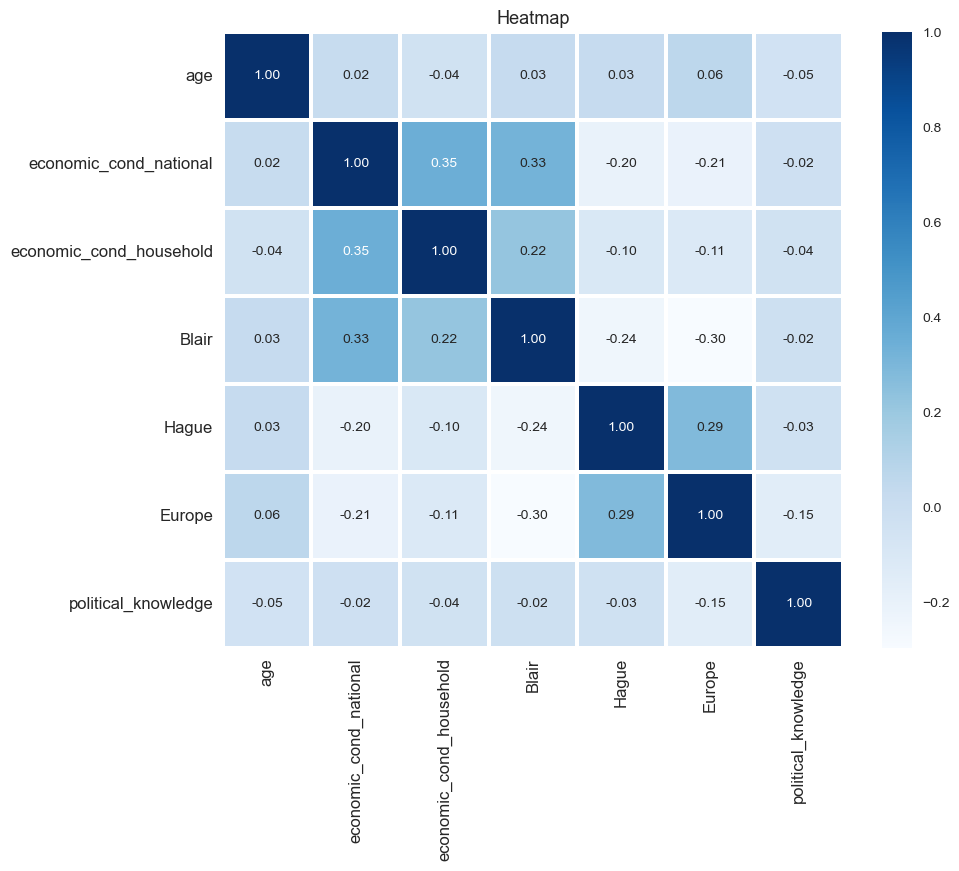

In [52]:
plt.figure(figsize=(10,8))
res =sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap= 'Blues', linewidths=1.5)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
plt.title('Heatmap',fontsize = 13)
res.set_yticklabels(res.get_ymajorticklabels(),fontsize = 12)
plt.show()



## Check for Outliers

<AxesSubplot:>

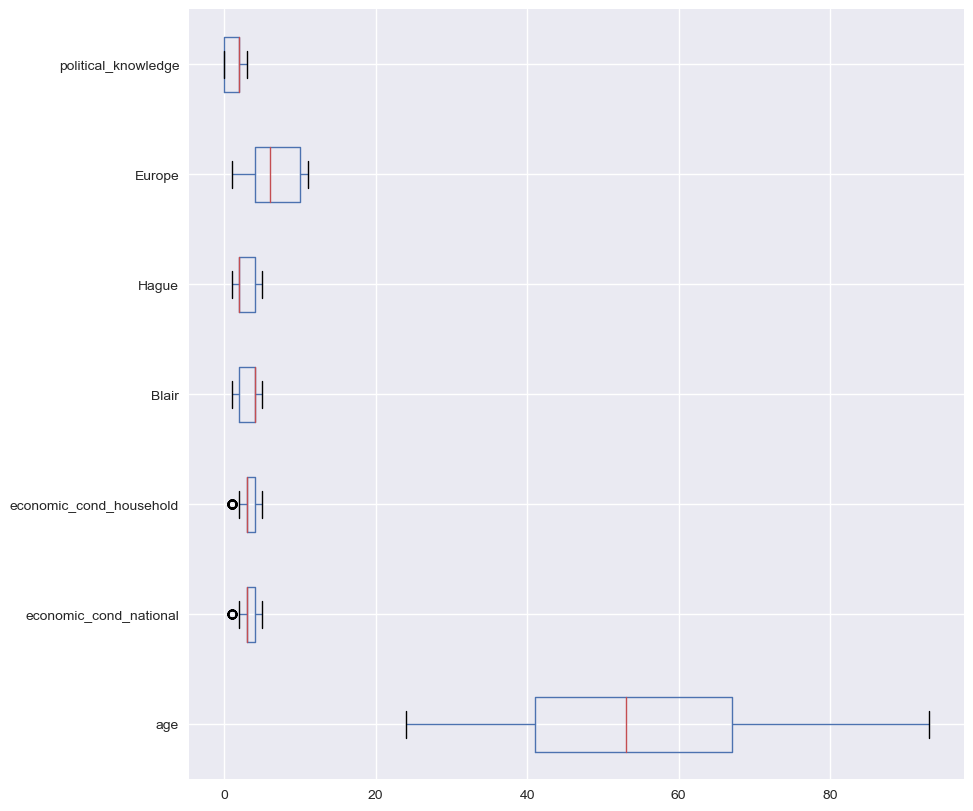

In [53]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)

There are Outliers present in column "Economic Condition Of Household & National"

In [54]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

       

In [55]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [57]:
X = df.drop("vote" , axis=1)
y = df.pop("vote")

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [59]:
print('Dimensions of the trianing and test data')
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

Dimensions of the trianing and test data
X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)


In [60]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
                  columns = [i for i in ['Conservative','Labour']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",round(model.score(X_train,y_train),2))
        print("Accuracy on test set : ",round(model.score(X_test,y_test),2))
        print("Recall on training set : ",round(metrics.recall_score(y_train,pred_train),2))
        print("Recall on test set : ",round(metrics.recall_score(y_test,pred_test),2))
        print("Precision on training set : ",round(metrics.precision_score(y_train,pred_train),2))
        print("Precision on test set : ",round(metrics.precision_score(y_test,pred_test),2))
    
    return score_list # returning the list with train and test scores

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Logistic Regression

In [63]:
lrg = LogisticRegression()
lrg.fit(X_train,y_train)

LogisticRegression()

In [64]:
lrg_score = get_metrics_score(lrg)

Accuracy on training set :  0.83
Accuracy on test set :  0.85
Recall on training set :  0.9
Recall on test set :  0.93
Precision on training set :  0.86
Precision on test set :  0.87


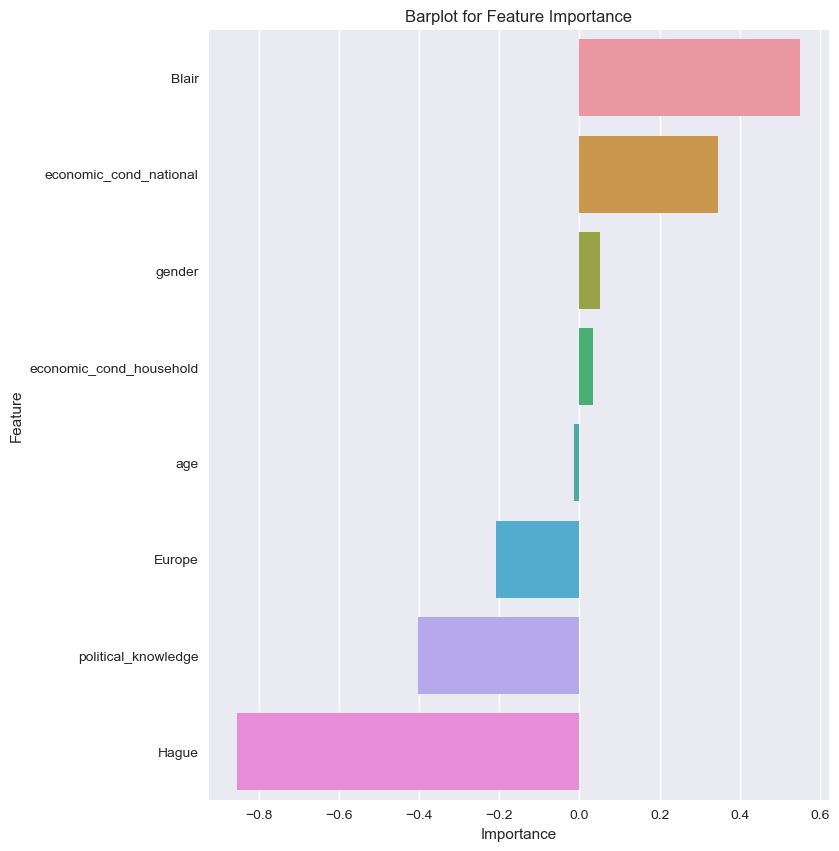

In [65]:
feature_rank = pd.DataFrame({'Feature':X_train.columns,'Importance': lrg.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(y= 'Feature',x='Importance',data=feature_rank)
plt.title('Barplot for Feature Importance');

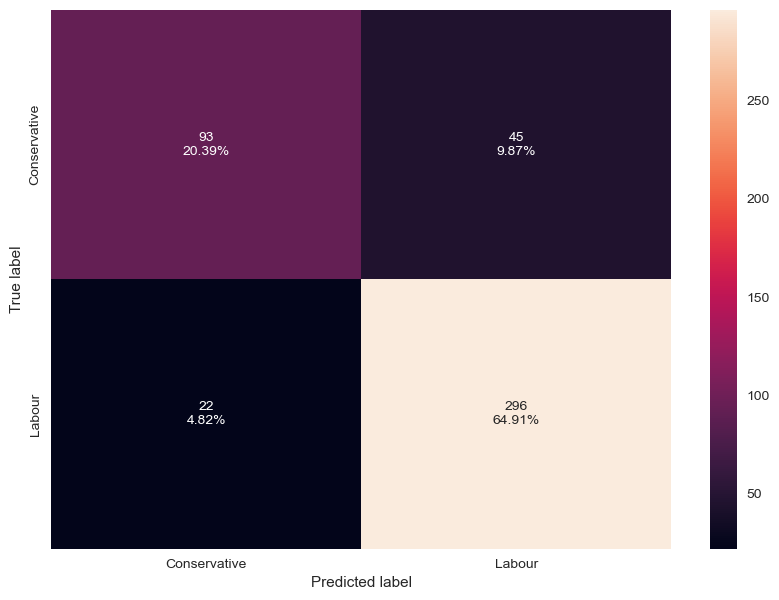

In [66]:
make_confusion_matrix(lrg,y_test)

AUC: for Training data 0.877
AUC: for Test data 0.913


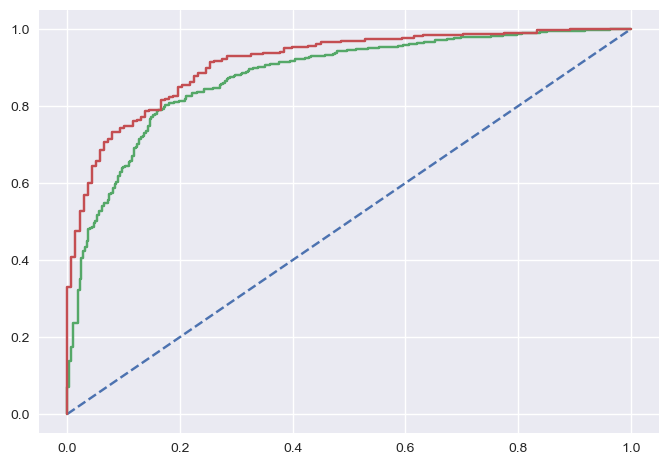

In [67]:
# predict probabilities
train_probs = lrg.predict_proba(X_train) 
test_probs = lrg.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc) 
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label ='Train Curve');
plt.plot(test_fpr, test_tpr,label = 'Test Curve');

### Linear Discriminant Analysis

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [70]:
lda_score = get_metrics_score(lda)

Accuracy on training set :  0.82
Accuracy on test set :  0.85
Recall on training set :  0.89
Recall on test set :  0.92
Precision on training set :  0.86
Precision on test set :  0.87


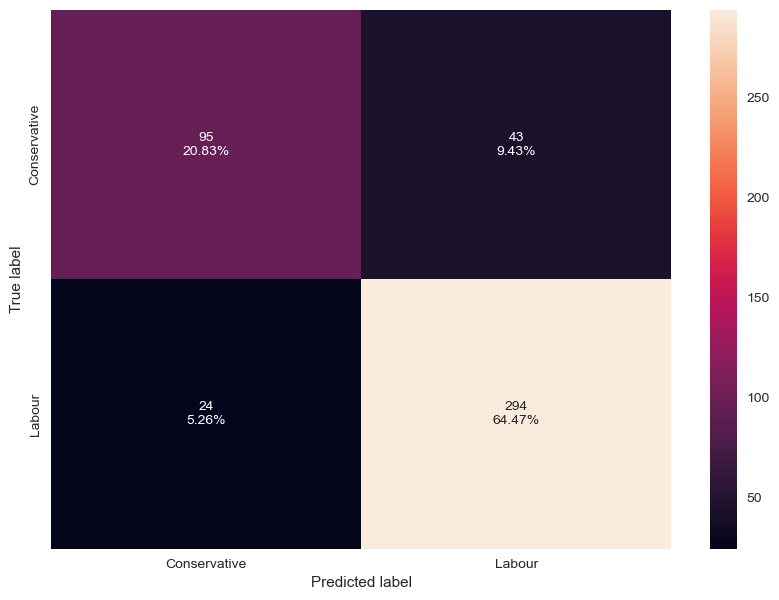

In [71]:
make_confusion_matrix(lda ,y_test)

AUC: for Training data 0.877
AUC: for Test data 0.914


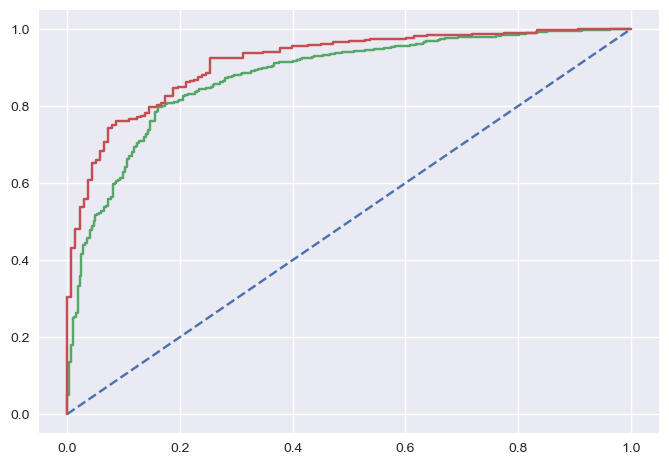

In [72]:
# predict probabilities
train_probs = lda.predict_proba(X_train) 
test_probs = lda.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc) 
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### KNN Model

In [73]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [75]:
KNN_score = get_metrics_score(KNN_model)

Accuracy on training set :  0.85
Accuracy on test set :  0.81
Recall on training set :  0.91
Recall on test set :  0.88
Precision on training set :  0.88
Precision on test set :  0.85


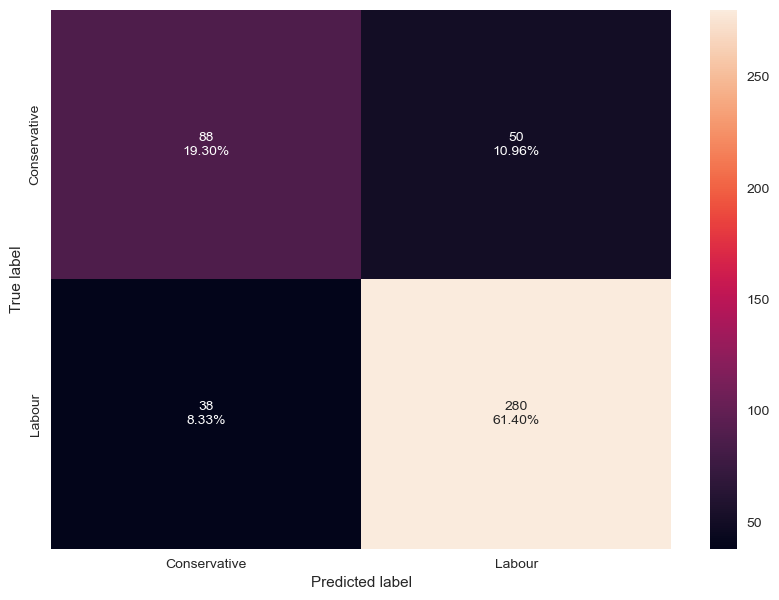

In [76]:
make_confusion_matrix(KNN_model,y_test)

AUC: for Training data 0.918
AUC: for Test data 0.860


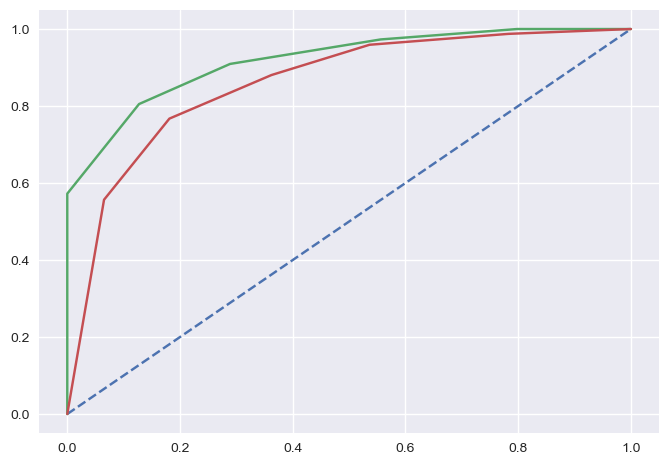

In [77]:
# predict probabilities
train_probs = KNN_model.predict_proba(X_train) 
test_probs = KNN_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label='Train Curve');
plt.plot(test_fpr, test_tpr,label='Test Curve');

### Naive Bayes Model

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [80]:
nb_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [81]:
nb_score = get_metrics_score(nb_model)

Accuracy on training set :  0.82
Accuracy on test set :  0.86
Recall on training set :  0.87
Recall on test set :  0.92
Precision on training set :  0.87
Precision on test set :  0.88


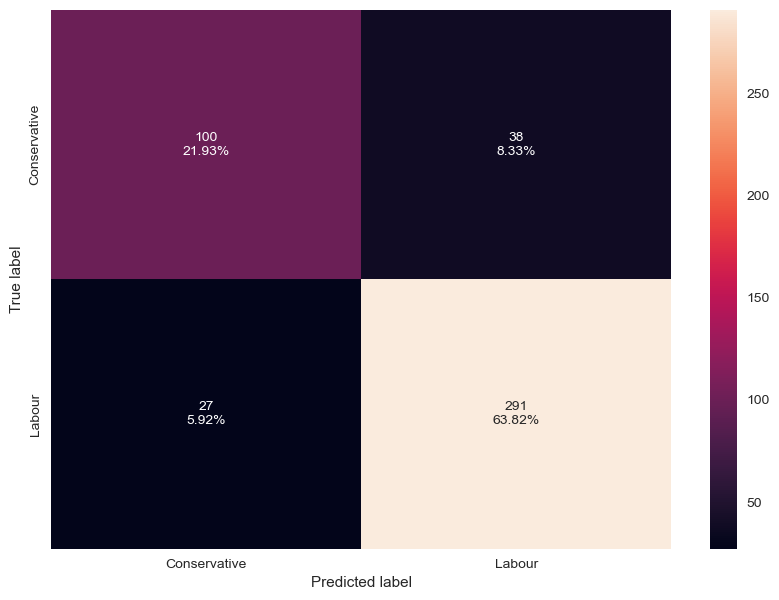

In [82]:
make_confusion_matrix(nb_model,y_test)

AUC: for Training data 0.873
AUC: for Test data 0.912


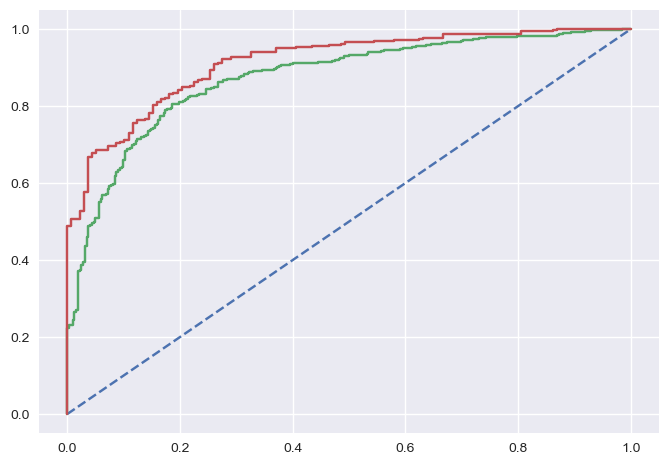

In [83]:
# predict probabilities
train_probs = nb_model.predict_proba(X_train) 
test_probs = nb_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Support Vector Machine Model

In [84]:
from sklearn import svm

svm_model = svm.SVC(probability=True, random_state=1)
svm_model.fit(X_train,y_train)

SVC(probability=True, random_state=1)

In [85]:
svm_score = get_metrics_score(svm_model)

Accuracy on training set :  0.72
Accuracy on test set :  0.73
Recall on training set :  1.0
Recall on test set :  0.99
Precision on training set :  0.71
Precision on test set :  0.72


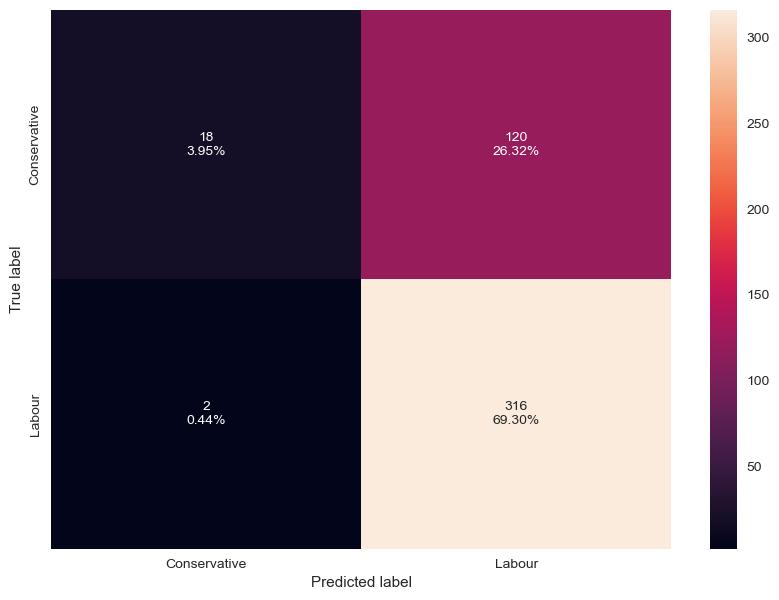

In [86]:
make_confusion_matrix(svm_model,y_test)

AUC: for Training data 0.867
AUC: for Test data 0.911


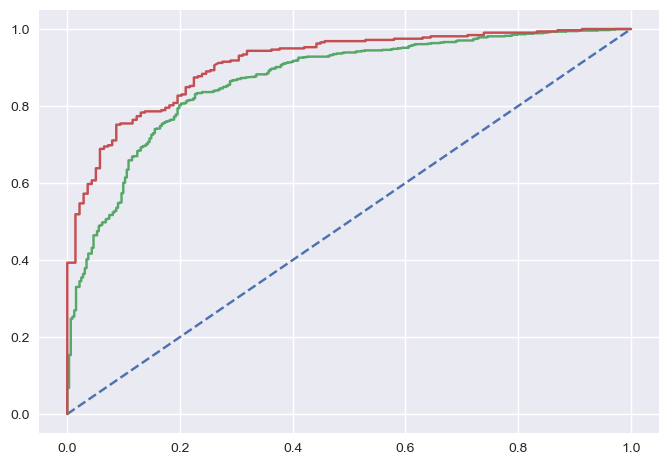

In [87]:
# predict probabilities
train_probs = svm_model.predict_proba(X_train) 
test_probs = svm_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

### Model Tuning

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)

In [89]:
X_train_sm, y_train_sm=sm.fit_resample(X_train, y_train)

In [90]:
sm.get_params()

{'k_neighbors': 5,
 'n_jobs': None,
 'random_state': 1,
 'sampling_strategy': 'auto'}

In [91]:
logit_sm_model = LogisticRegression()
logit_sm_model.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [92]:
logit_sm_score = get_metrics_score(logit_sm_model)

Accuracy on training set :  0.82
Accuracy on test set :  0.84
Recall on training set :  0.82
Recall on test set :  0.85
Precision on training set :  0.91
Precision on test set :  0.91


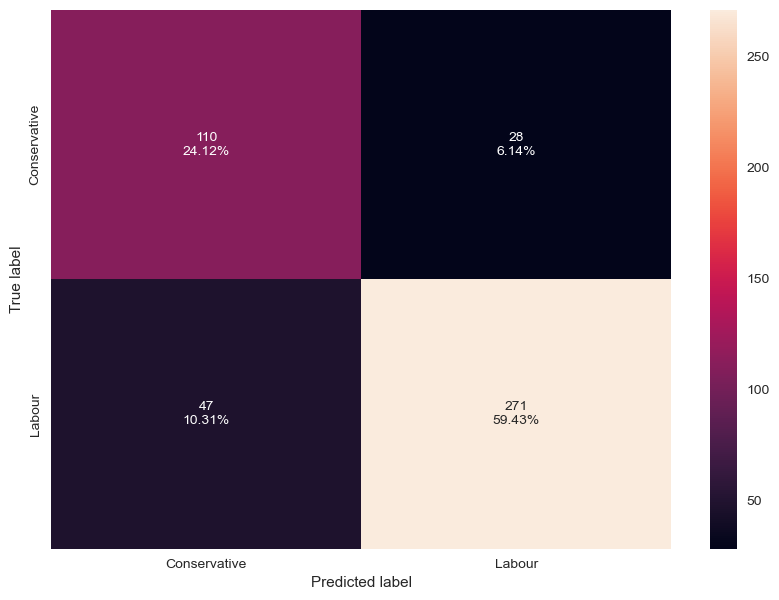

In [93]:
make_confusion_matrix(logit_sm_model,y_test)

AUC: for Training data 0.872
AUC: for Test data 0.917


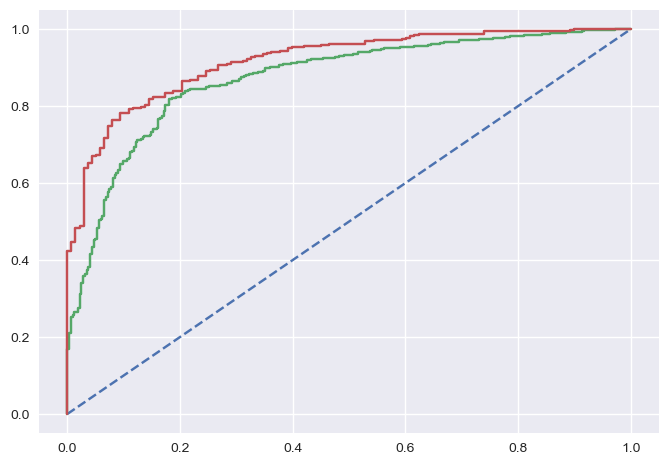

In [94]:
# predict probabilities
train_probs = logit_sm_model.predict_proba(X_train) 
test_probs = logit_sm_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### LDA with SMOTE

In [95]:
lda_sm_model = LinearDiscriminantAnalysis()
lda_sm_model.fit(X_train_sm,y_train_sm)

LinearDiscriminantAnalysis()

In [96]:
lda_sm_model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [97]:
lda_sm_score = get_metrics_score(lda_sm_model)

Accuracy on training set :  0.81
Accuracy on test set :  0.84
Recall on training set :  0.81
Recall on test set :  0.85
Precision on training set :  0.91
Precision on test set :  0.91


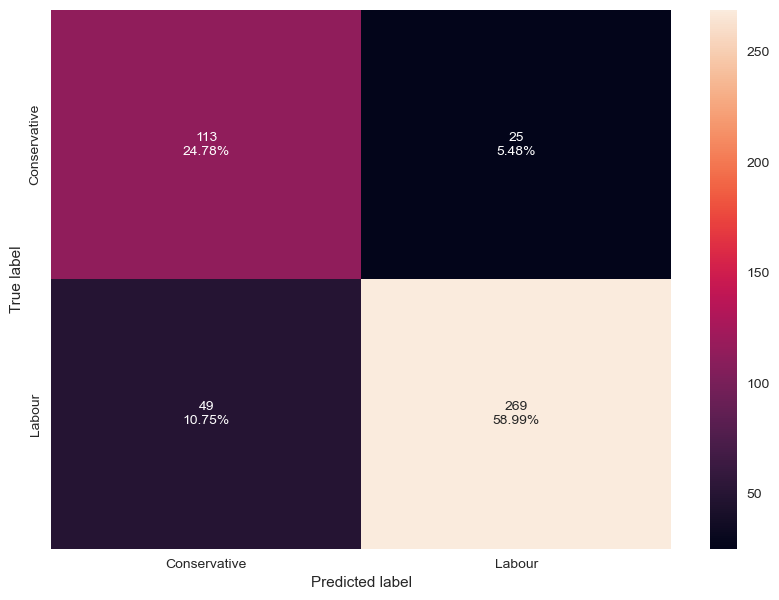

In [98]:
make_confusion_matrix(lda_sm_model,y_test)

AUC: for Training data 0.873
AUC: for Test data 0.916


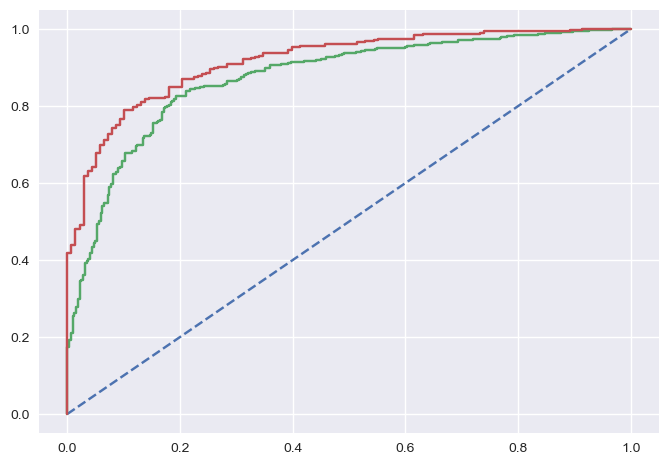

In [99]:
# predict probabilities
train_probs = lda_sm_model.predict_proba(X_train) 
test_probs = lda_sm_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### KNN with SMOTE

In [100]:
KNN_sm_model = KNeighborsClassifier()

In [101]:
KNN_sm_model.fit(X_train_sm,y_train_sm)


KNeighborsClassifier()

In [102]:
KNN_sm_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [103]:
KNN_sm_score = get_metrics_score(KNN_sm_model)

Accuracy on training set :  0.85
Accuracy on test set :  0.78
Recall on training set :  0.82
Recall on test set :  0.77
Precision on training set :  0.96
Precision on test set :  0.9


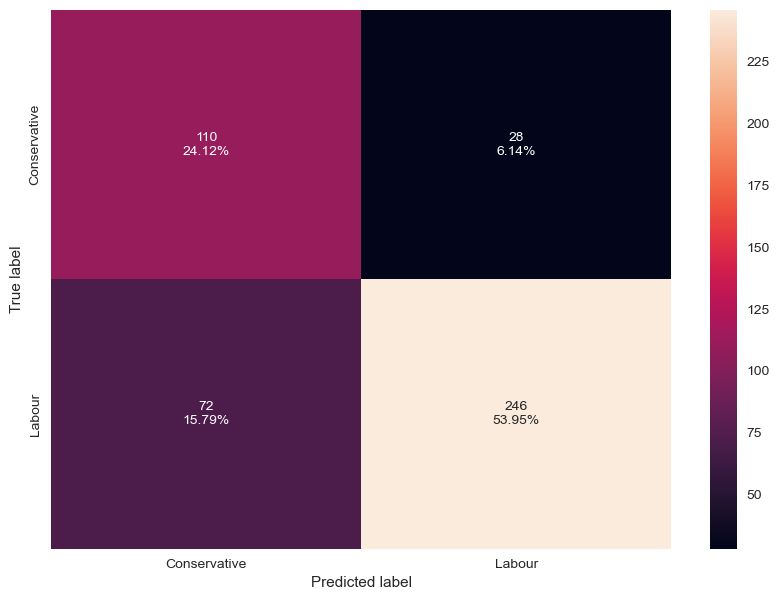

In [104]:
make_confusion_matrix(KNN_sm_model,y_test) 

AUC: for Training data 0.950
AUC: for Test data 0.860


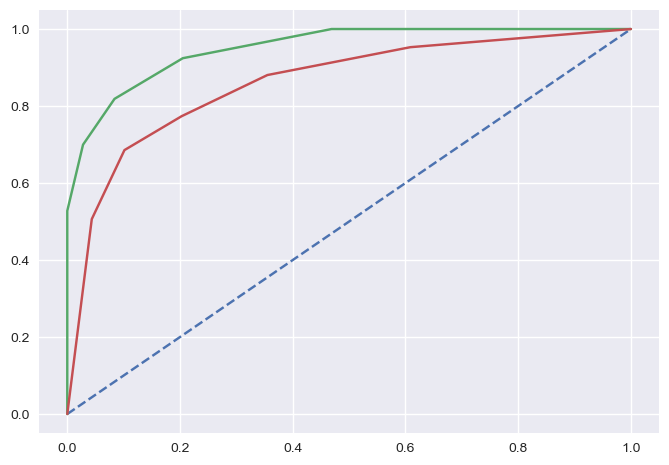

In [105]:
# predict probabilities
train_probs = KNN_sm_model.predict_proba(X_train) 
test_probs = KNN_sm_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### SVM with SMOTE

In [106]:
svm_sm_model = svm.SVC(probability=True, random_state=1)
svm_sm_model.fit(X_train_sm,y_train_sm)

SVC(probability=True, random_state=1)

In [107]:
ytrain_predict = svm_sm_model.predict(X_train_sm)
ytest_predict = svm_sm_model.predict(X_test)

In [108]:
svm_sm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [109]:
svm_sm_score = get_metrics_score(svm_sm_model)

Accuracy on training set :  0.79
Accuracy on test set :  0.82
Recall on training set :  0.78
Recall on test set :  0.8
Precision on training set :  0.9
Precision on test set :  0.93


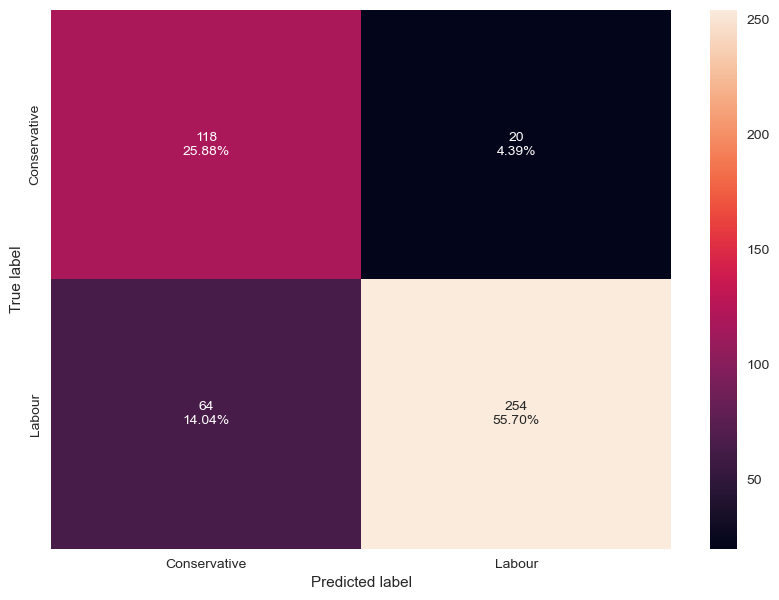

In [110]:
make_confusion_matrix(svm_sm_model,y_test)

AUC: for Training data 0.859
AUC: for Test data 0.904


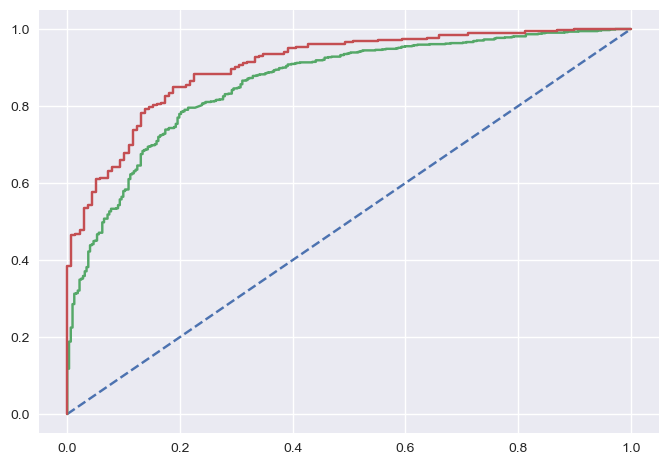

In [111]:
# predict probabilities
train_probs = svm_sm_model.predict_proba(X_train) 
test_probs = svm_sm_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Hyperparameter tuning using GridsearchCV

#### Logistic Regression with GridsearchCV

In [112]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2,1:1})
clf = LogisticRegression(class_weight = class_weight,)
grid_values = {'penalty': ['12','none'],
              'C':np.logspace(-3,3.20),
              'solver':['newton-cg','lbfgs','sag','saga']}
logit_model3 = GridSearchCV(clf, param_grid= grid_values , cv=10, n_jobs=-1)
logit_model3.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 1.33822954e-03, 1.79085830e-03, 2.39657948e-03,
       3.20717346e-03, 4.29193426e-03, 5.74359321e-03, 7.68624610e-03,
       1.02859616e-02, 1.37649776e-02, 1.84206997e-02, 2.46511245e-02,
       3.29888630e-02, 4.41466709e-02, 5.90783791e-02, 7.90604321e-02,
       1.058...
       3.49025488e+00, 4.67076218e+00, 6.25055193e+00, 8.36467323e+00,
       1.11938528e+01, 1.49799445e+01, 2.00466042e+01, 2.68269580e+01,
       3.59006276e+01, 4.80432804e+01, 6.42929370e+01, 8.60387075e+01,
       1.15139540e+02, 1.54083134e+02, 2.06198601e+02, 2.75941059e+02,
       3.69272476e+02, 4.94171336e+02, 6.61314680e+02, 8.84990840e+02,
       1.18432088e+03, 1.58489319e+03]),
                         'penalty': ['12', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [113]:
print('Best Parametes', logit_model3.best_estimator_)

Best Parametes LogisticRegression(C=0.001, class_weight={0: 2, 1: 1}, penalty='none',
                   solver='newton-cg')


In [114]:
logit_score3 = get_metrics_score(logit_model3)

Accuracy on training set :  0.82
Accuracy on test set :  0.83
Recall on training set :  0.83
Recall on test set :  0.86
Precision on training set :  0.9
Precision on test set :  0.9


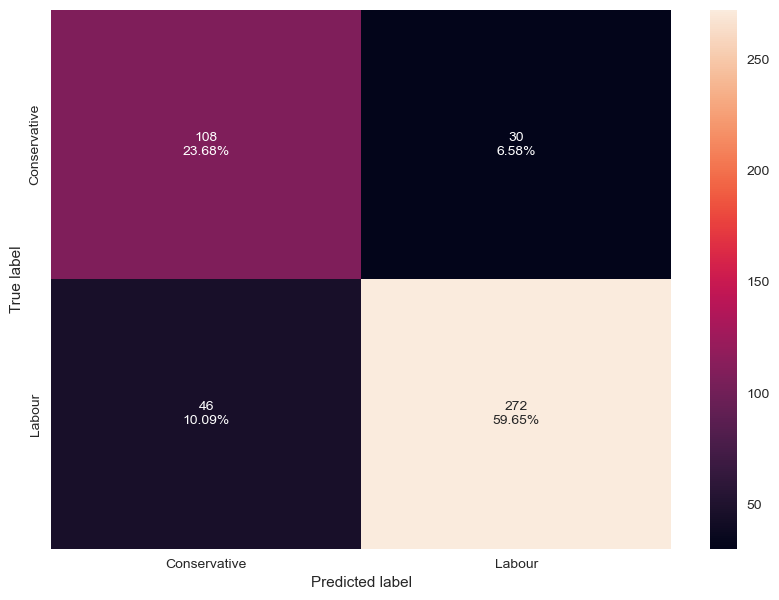

In [115]:
make_confusion_matrix(logit_model3,y_test) 

AUC: for Training data 0.878
AUC: for Test data 0.914


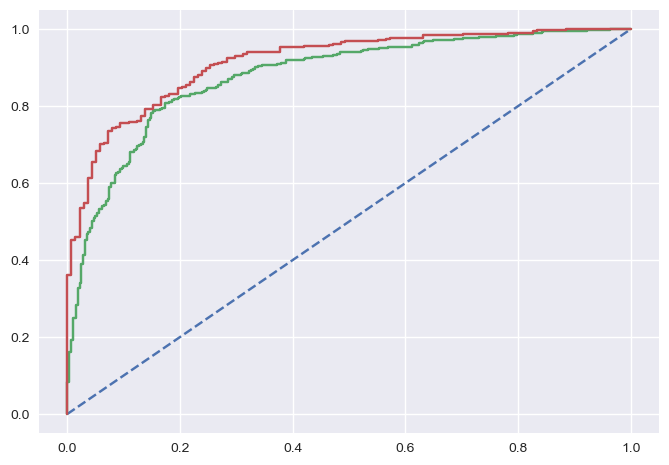

In [116]:
# predict probabilities
train_probs = logit_model3.predict_proba(X_train) 
test_probs = logit_model3.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Linear Discriminant Analysis with GridsearchCV

In [117]:
clfa = LinearDiscriminantAnalysis()
grid_values ={'solver':['svd','lsqr','eigen'],
             'tol':[0.0001,0.001,0.01]}
LDA_model3 = GridSearchCV(clfa, param_grid= grid_values,cv=3)
LDA_model3.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [118]:
print('Best Parameters from LDA', LDA_model3.best_params_)

Best Parameters from LDA {'solver': 'lsqr', 'tol': 0.0001}


In [119]:
LDA_score = get_metrics_score(LDA_model3)

Accuracy on training set :  0.82
Accuracy on test set :  0.85
Recall on training set :  0.89
Recall on test set :  0.92
Precision on training set :  0.86
Precision on test set :  0.87


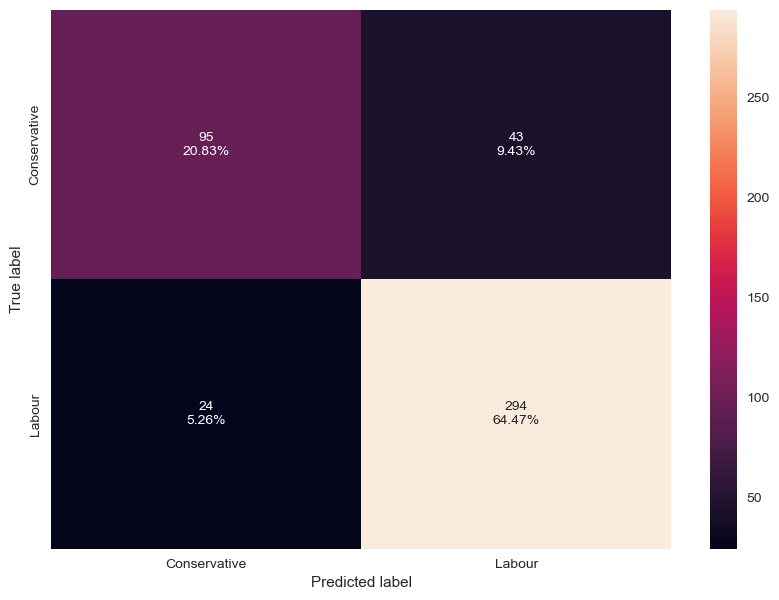

In [120]:
make_confusion_matrix(LDA_model3,y_test) 

AUC: for Training data 0.877
AUC: for Test data 0.914


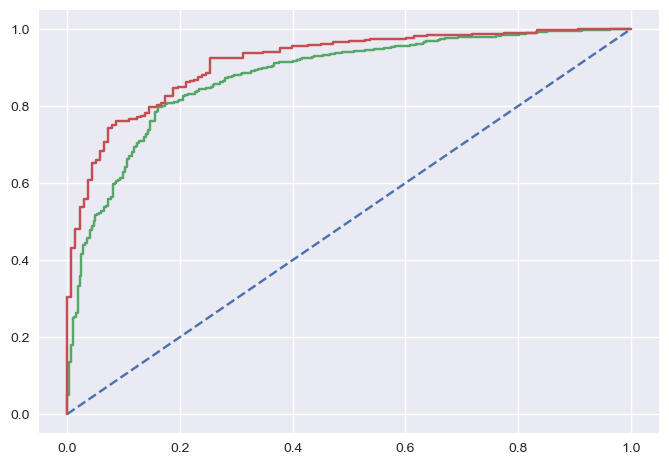

In [121]:
# predict probabilities
train_probs = LDA_model3.predict_proba(X_train) 
test_probs = LDA_model3.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Bagging using RandomForest

In [122]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight= dict({0:4,1:1.5})
rfcl = RandomForestClassifier(min_samples_leaf=2,
                             min_samples_split=4,
                             class_weight=class_weight)

Bagging_model=BaggingClassifier(base_estimator=rfcl, n_estimators=50,
                               random_state=1) 
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [123]:
Bagging_score = get_metrics_score(Bagging_model)

Accuracy on training set :  0.9
Accuracy on test set :  0.85
Recall on training set :  0.91
Recall on test set :  0.89
Precision on training set :  0.95
Precision on test set :  0.89


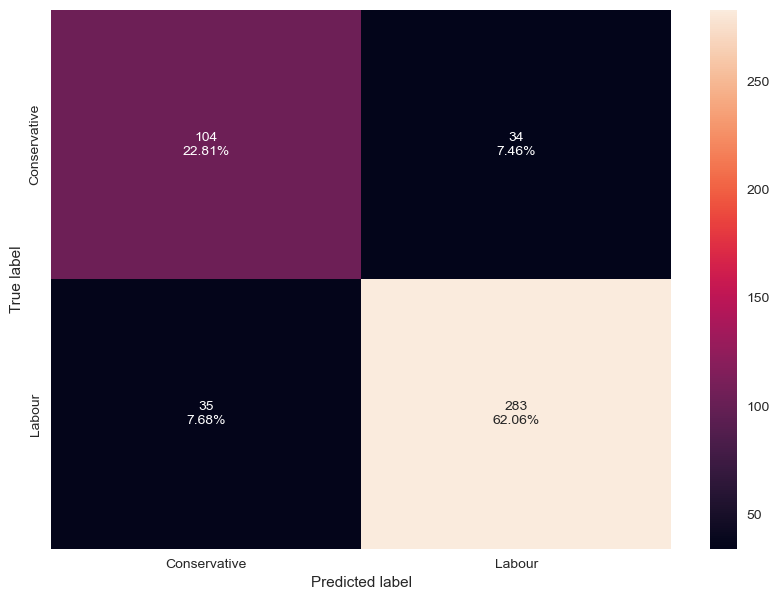

In [124]:
make_confusion_matrix(Bagging_model,y_test)

AUC: for Training data 0.966
AUC: for Test data 0.916


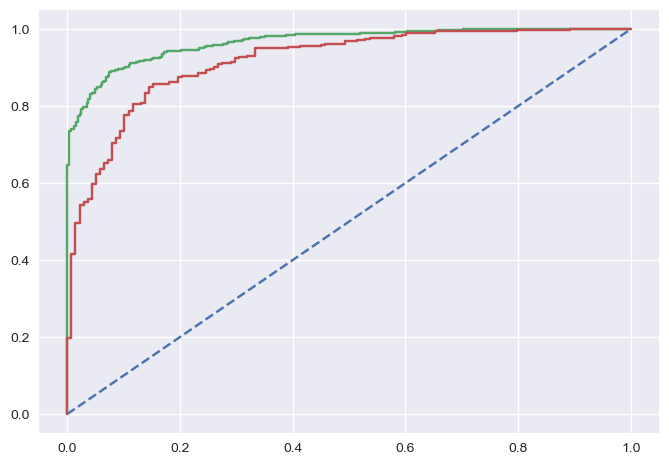

In [125]:
# predict probabilities
train_probs = Bagging_model.predict_proba(X_train) 
test_probs = Bagging_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### XGBoost

In [126]:
import xgboost as xgb 

XGB_model = xgb.XGBClassifier(max_dept = 5,
                             min_child_weight = 3,
                             learning_rate = 0.01,
                             n_estimator = 1000)
XGB_model.fit(X_train, y_train)

[19:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dept=5, max_depth=None, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimator=1000, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [127]:
XGB_score = get_metrics_score(XGB_model) 

Accuracy on training set :  0.86
Accuracy on test set :  0.84
Recall on training set :  0.91
Recall on test set :  0.92
Precision on training set :  0.89
Precision on test set :  0.86


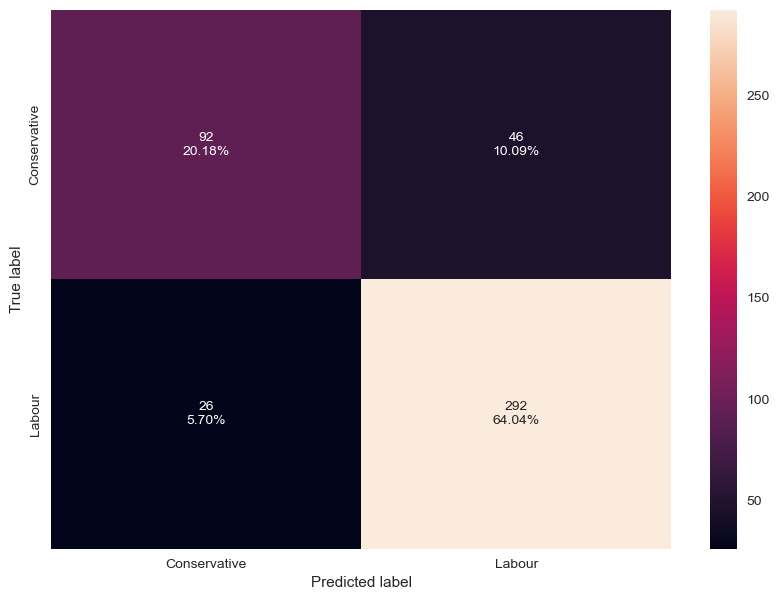

In [128]:
make_confusion_matrix(XGB_model,y_test) 

AUC: for Training data 0.919
AUC: for Test data 0.899


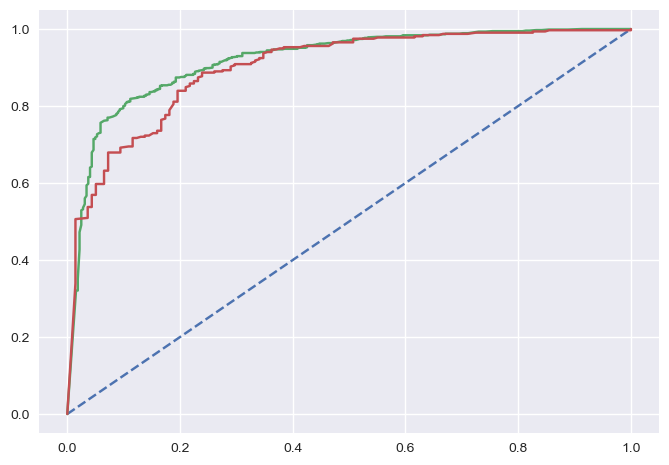

In [129]:
# predict probabilities
train_probs = XGB_model.predict_proba(X_train) 
test_probs = XGB_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### KNN Model with GridSearchCV

In [130]:
clf = KNeighborsClassifier()
grid_values= {'n_neighbors':range(5,20),
             'weights':['uniform'],'metric': ['minkowski','eculidean','canberra']}
Knn_model3 = GridSearchCV(clf, param_grid= grid_values, cv = 5)
Knn_model3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'eculidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [131]:
print('Best Parameters from KNN Model', Knn_model3.best_params_)

Best Parameters from KNN Model {'metric': 'canberra', 'n_neighbors': 10, 'weights': 'uniform'}


In [132]:
Knn_score = get_metrics_score(Knn_model3)

Accuracy on training set :  0.84
Accuracy on test set :  0.85
Recall on training set :  0.88
Recall on test set :  0.88
Precision on training set :  0.89
Precision on test set :  0.9


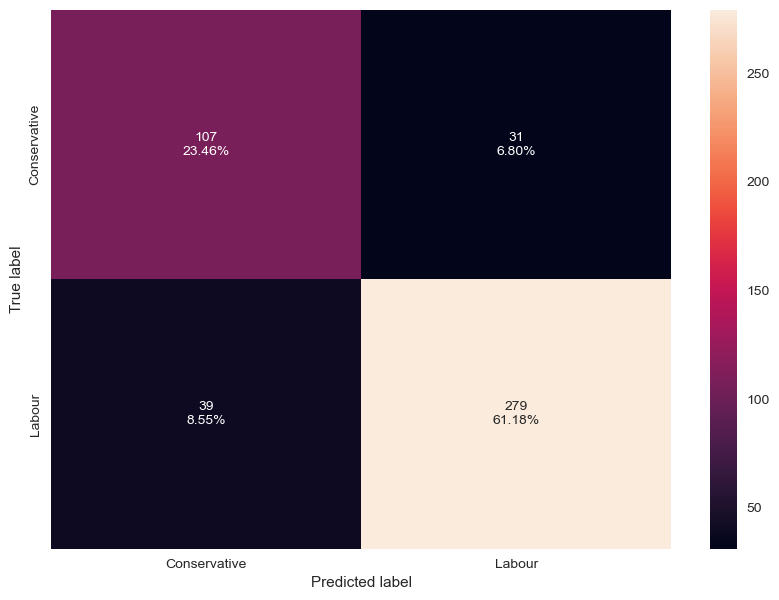

In [133]:
make_confusion_matrix(Knn_model3,y_test)

AUC: for Training data 0.909
AUC: for Test data 0.892


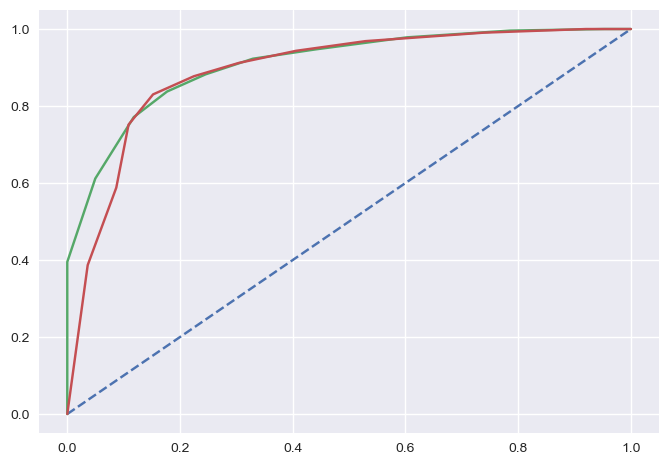

In [134]:
# predict probabilities
train_probs = Knn_model3.predict_proba(X_train) 
test_probs = Knn_model3.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Support Vector Machine with GridSearchCV

In [135]:
class_weight = dict({0:2.3, 1:1})
clf = svm.SVC(probability=True, class_weight= class_weight)
grid_values = {'C': np.logspace(-1,1,20),
              'kernel': ['linear']}
SVM_model3 = GridSearchCV(clf,param_grid = grid_values , cv = 3)
SVM_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 2.3, 1: 1}, probability=True),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'kernel': ['linear']})

In [136]:
print('Best Parameters from SVM Model', SVM_model3.best_params_)

Best Parameters from SVM Model {'C': 0.1, 'kernel': 'linear'}


In [137]:
SVM_score = get_metrics_score(SVM_model3)

Accuracy on training set :  0.81
Accuracy on test set :  0.84
Recall on training set :  0.8
Recall on test set :  0.83
Precision on training set :  0.91
Precision on test set :  0.92


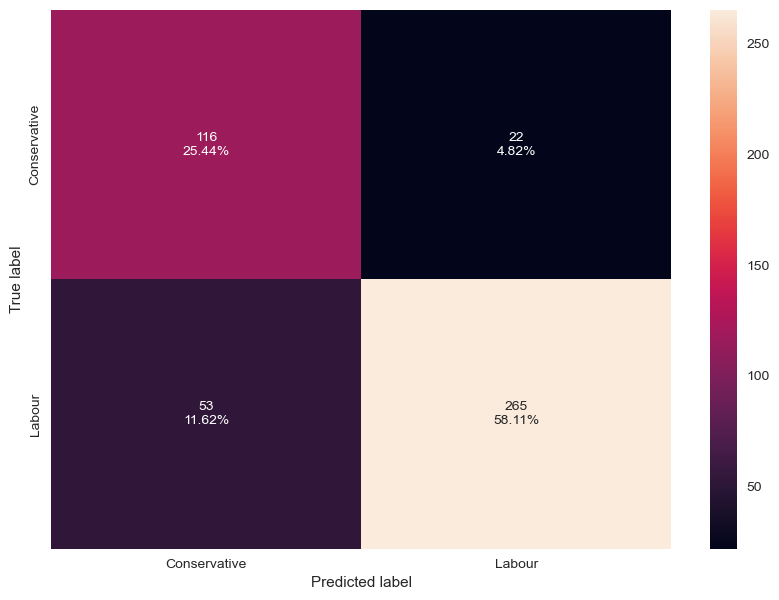

In [138]:
make_confusion_matrix(SVM_model3,y_test)

AUC: for Training data 0.876
AUC: for Test data 0.913


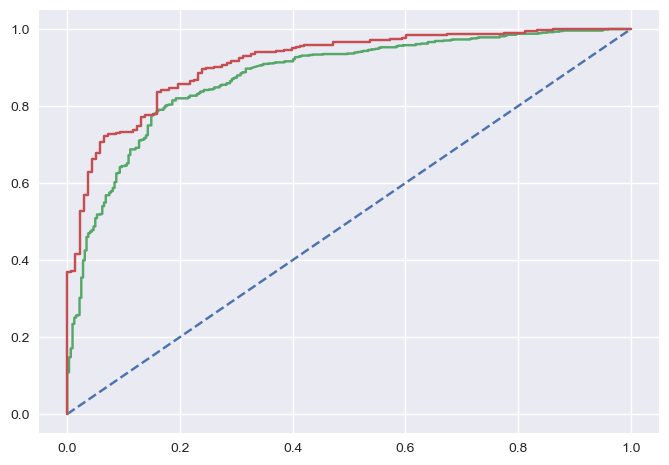

In [139]:

# predict probabilities
train_probs = SVM_model3.predict_proba(X_train) 
test_probs = SVM_model3.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Gradient Boosting Classifer

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators=500, max_depth=10)
GBC_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [141]:
GBC_score = get_metrics_score(GBC_model)

Accuracy on training set :  1.0
Accuracy on test set :  0.82
Recall on training set :  1.0
Recall on test set :  0.9
Precision on training set :  1.0
Precision on test set :  0.86


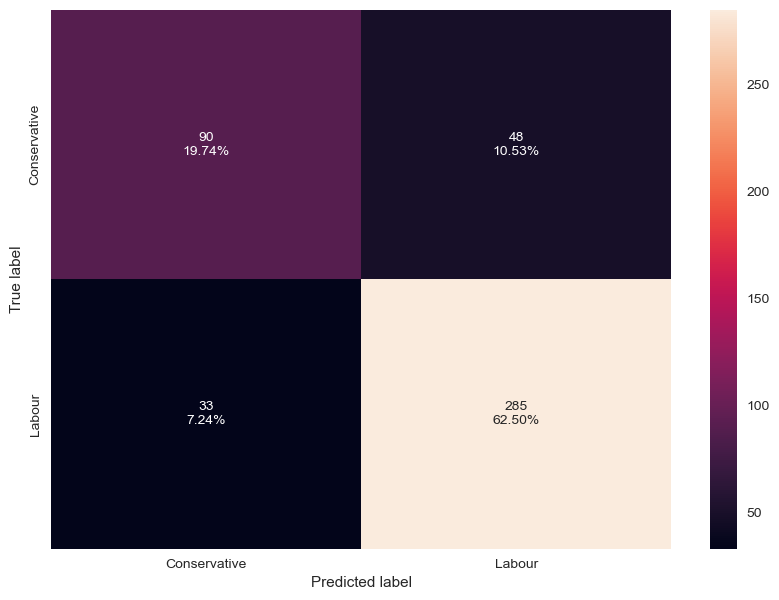

In [142]:
make_confusion_matrix(GBC_model,y_test)

AUC: for Training data 1.000
AUC: for Test data 0.864


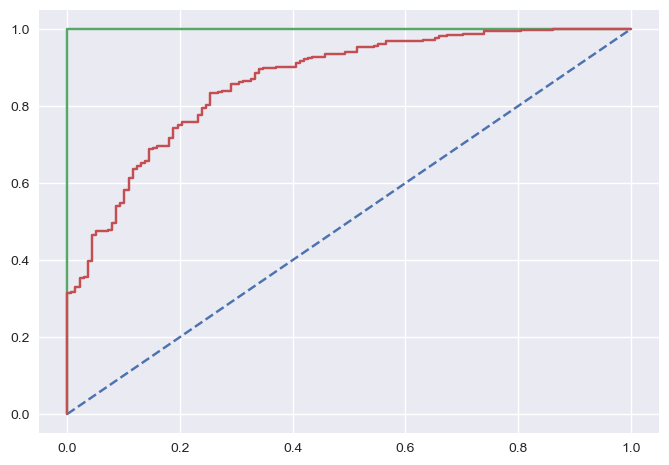

In [143]:
# predict probabilities
train_probs = GBC_model.predict_proba(X_train) 
test_probs = GBC_model.predict_proba(X_test) 
# keep probabilities for the positive outcome only
train_probs = train_probs[:, 1]
test_probs = test_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, train_probs) 
print('AUC: for Training data %.3f' % auc)
test_auc = roc_auc_score(y_test, test_probs) 
print('AUC: for Test data %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_probs)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_probs) 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.plot(test_fpr, test_tpr);

### Cross Validation of all final Models

### Logistic Regression

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
scores = cross_val_score(logit_model3,X_train,y_train, cv = 10, n_jobs=1)
scores

array([0.85981308, 0.8490566 , 0.78301887, 0.80188679, 0.83962264,
       0.77358491, 0.76415094, 0.76415094, 0.8490566 , 0.81132075])

In [146]:
scores = cross_val_score(logit_model3, X_test,y_test, cv=10,n_jobs=1)
scores

array([0.82608696, 0.84782609, 0.86956522, 0.7826087 , 0.82608696,
       0.7826087 , 0.77777778, 0.88888889, 0.91111111, 0.91111111])

In [147]:
print('Logit Test Accuracy:%0.2f (+/- %0.2f)'% (scores.mean(),scores.std()))

Logit Test Accuracy:0.84 (+/- 0.05)


### LDA

In [148]:
scores = cross_val_score(lda_sm_model,X_train_sm,y_train_sm , cv = 10,n_jobs=1)
scores

array([0.83108108, 0.81756757, 0.80405405, 0.83783784, 0.85135135,
       0.81081081, 0.78378378, 0.79054054, 0.87755102, 0.86394558])

In [149]:
print('LDA Train Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

LDA Train Accuracy: 0.83 (+/- 0.03)


In [150]:
scores = cross_val_score(lda_sm_model,X_test,y_test , cv = 10,n_jobs=1)
scores

array([0.84782609, 0.91304348, 0.84782609, 0.82608696, 0.80434783,
       0.7826087 , 0.75555556, 0.91111111, 0.93333333, 0.91111111])

In [151]:
print('LDA Test Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

LDA Test Accuracy: 0.85 (+/- 0.06)


### KNN

In [152]:
scores = cross_val_score(Knn_model3,X_train_sm,y_train_sm , cv = 10,n_jobs=1)
scores

array([0.82432432, 0.86486486, 0.79054054, 0.80405405, 0.88513514,
       0.83108108, 0.79054054, 0.84459459, 0.88435374, 0.82312925])

In [153]:
print('KNN Train Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

KNN Train Accuracy: 0.83 (+/- 0.03)


In [154]:
scores = cross_val_score(Knn_model3,X_test,y_test , cv = 10,n_jobs=1)
scores

array([0.82608696, 0.91304348, 0.89130435, 0.76086957, 0.80434783,
       0.82608696, 0.77777778, 0.88888889, 0.84444444, 0.91111111])

In [155]:
print('KNN Test Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

KNN Test Accuracy: 0.84 (+/- 0.05)


### SVM

In [156]:
scores = cross_val_score(SVM_model3,X_train,y_train ,cv=10,n_jobs=1)
scores

array([0.86915888, 0.8490566 , 0.76415094, 0.81132075, 0.82075472,
       0.78301887, 0.74528302, 0.75471698, 0.82075472, 0.80188679])

In [157]:
print('SVM Train Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

SVM Train Accuracy: 0.80 (+/- 0.04)


In [158]:
scores = cross_val_score(SVM_model3,X_test,y_test, cv =10,n_jobs=1)
scores

array([0.80434783, 0.82608696, 0.89130435, 0.7173913 , 0.82608696,
       0.76086957, 0.77777778, 0.88888889, 0.86666667, 0.88888889])

In [159]:
print('SVM Test Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

SVM Test Accuracy: 0.82 (+/- 0.06)


#### Bagging with RandomForest

In [160]:
scores = cross_val_score(Bagging_model, X_train_sm, y_train_sm,cv=10,n_jobs=1)

In [161]:
print('Bagging Train Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

Bagging Train Accuracy: 0.85 (+/- 0.04)


In [162]:
scores = cross_val_score(Bagging_model,X_test,y_test,cv = 10, n_jobs=1)

In [163]:
print('Bagging Test Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

Bagging Test Accuracy: 0.85 (+/- 0.07)


### XGBoost

In [164]:
scores = cross_val_score(XGB_model,X_train_sm,y_train_sm,cv=10,n_jobs=1)
scores

[20:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.c

array([0.83783784, 0.83108108, 0.81081081, 0.7972973 , 0.83783784,
       0.85135135, 0.81756757, 0.85135135, 0.89115646, 0.89115646])

In [165]:
print('XGBoost Train Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

XGBoost Train Accuracy: 0.84 (+/- 0.03)


In [166]:
scores = cross_val_score(XGB_model,X_test,y_test,cv = 10, n_jobs=1)
scores

[20:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dept", "n_estimator" } are not used.

[20:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.c

array([0.80434783, 0.91304348, 0.86956522, 0.82608696, 0.82608696,
       0.7826087 , 0.73333333, 0.84444444, 0.88888889, 0.82222222])

In [167]:
print('XGBoost Test Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(),scores.std()))

XGBoost Test Accuracy: 0.83 (+/- 0.05)


### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [168]:
# defining list of models
models = [lrg,logit_sm_model,logit_model3, lda,lda_sm_model,LDA_model3, KNN_model,Knn_model3,
          nb_model, Bagging_model,XGB_model,GBC_model]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [169]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with default paramters','Logistic Regression with SMOTE','Logistic Regression using Best Params',
                                          'Linear Discriminant Analysis','Linear Discriminant with SMOTE', 'Linear Discriminant using GridSearchCV',
                                          'KNN Model with default parameters','KNN Model with GridSearchCV',' Naive Based Model',
                                          'Bagging Model using RandomForest','XBoosting Model','Gradient Boosting'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0   Logistic Regression with default paramters            0.83           0.85   
1               Logistic Regression with SMOTE            0.82           0.84   
2        Logistic Regression using Best Params            0.82           0.83   
3                 Linear Discriminant Analysis            0.82           0.85   
4               Linear Discriminant with SMOTE            0.81           0.84   
5       Linear Discriminant using GridSearchCV            0.82           0.85   
6            KNN Model with default parameters            0.85           0.81   
7                  KNN Model with GridSearchCV            0.84           0.85   
8                            Naive Based Model            0.82           0.86   
9             Bagging Model using RandomForest            0.90           0.85   
10                             XBoosting Model            0.86           0.84   
11                           Gradient Boosting            1.00           0.82   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0           0.90         0.93             0.86            0.87  
1           0.82         0.85             0.91            0.91  
2           0.83         0.86             0.90            0.90  
3           0.89         0.92             0.86            0.87  
4           0.81         0.85             0.91            0.91  
5           0.89         0.92             0.86            0.87  
6           0.91         0.88             0.88            0.85  
7           0.88         0.88             0.89            0.90  
8           0.87         0.92             0.87            0.88  
9           0.91         0.89             0.95            0.89  
10          0.91         0.92             0.89            0.86  
11          1.00         0.90             1.00            0.86

### Problem 2 

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

In [170]:
import pandas as pd 
import nltk
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
#nltk.download('stopwords') # list of stopwords
#nltk.download('punkt') # List of punctuation marks 
import string # this is used for string manipulations
import re 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [171]:

index =['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech = pd.DataFrame({'President':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                                'Text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [172]:
inaugural_speech

President  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             Text  
1941-Roosevelt  On each national day of inauguration since 178...  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

### Number of words

In [173]:
from nltk.tokenize import word_tokenize
inaugural_speech['Word_count'] = inaugural_speech['Text'].apply(lambda x: len(word_tokenize(x)))
inaugural_speech[['President', 'Text','Word_count']]

President  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             Text  Word_count  
1941-Roosevelt  On each national day of inauguration since 178...        1526  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1543  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        2006

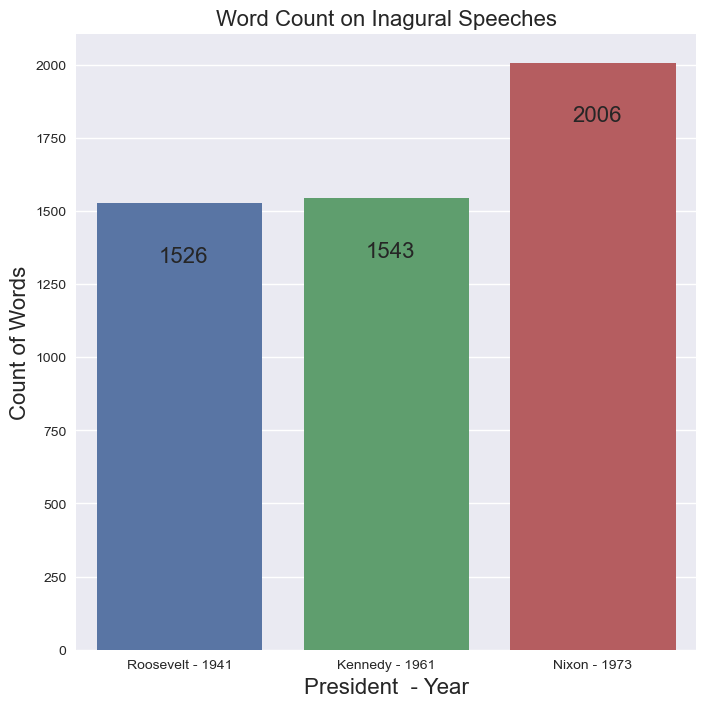

In [174]:
plt.figure(figsize=(8,8))
ax = sns.barplot(y='Word_count'
                , x='President', data= inaugural_speech)
plt.title('Word Count on Inagural Speeches', fontsize =16)
plt.xlabel('President  - Year', fontsize = 16)
plt.ylabel('Count of Words', fontsize = 16)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
               (p.get_x()+.3,
               p.get_height()-200),fontsize = 16)

In [175]:
inaugural_speech['Count_Char'] = inaugural_speech['Text'].str.len()
inaugural_speech[['President','Text','Count_Char']]

President  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             Text  Count_Char  
1941-Roosevelt  On each national day of inauguration since 178...        7571  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        7618  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        9991

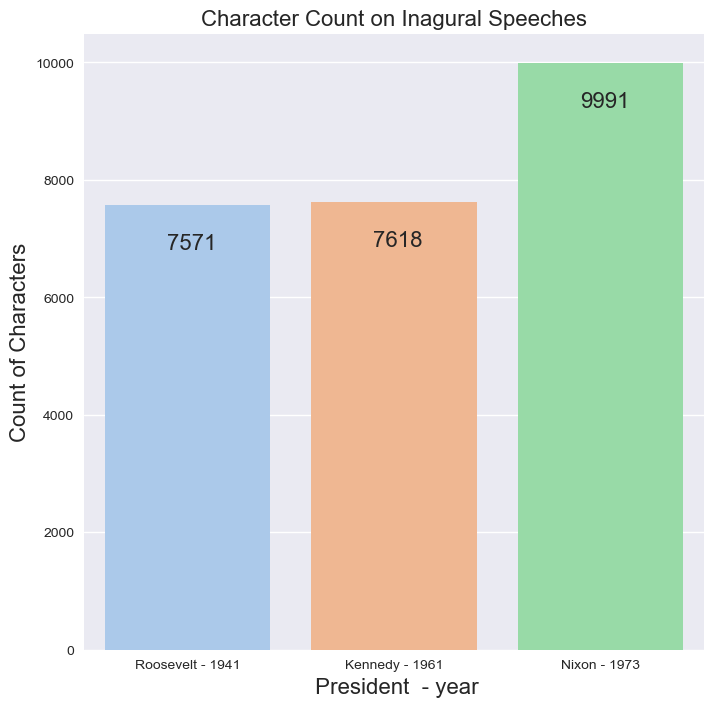

In [176]:
plt.figure(figsize=(8,8))
ax= sns.barplot(y= 'Count_Char', x = 'President', data = inaugural_speech, palette='pastel')
plt.title('Character Count on Inagural Speeches', fontsize = 16)
plt.xlabel(' President  - year', fontsize = 16)
plt.ylabel('Count of Characters', fontsize = 16)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
               (p.get_x()+.3,
               p.get_height()-750), fontsize = 16)

In [177]:
from nltk.tokenize import sent_tokenize
inaugural_speech['Sents_Count'] = inaugural_speech['Text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech[['President','Text','Sents_Count']]

President  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             Text  Sents_Count  
1941-Roosevelt  On each national day of inauguration since 178...           68  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...           52  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...           68

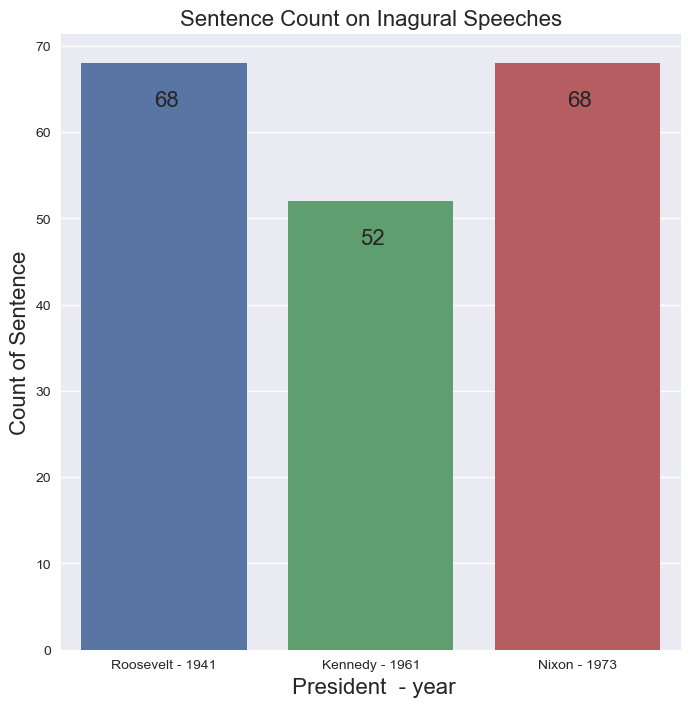

In [178]:
plt.figure(figsize=(8,8))
ax= sns.barplot(y= 'Sents_Count', x = 'President', data = inaugural_speech)
plt.title('Sentence Count on Inagural Speeches', fontsize = 16)
plt.xlabel(' President  - year', fontsize = 16)
plt.ylabel('Count of Sentence', fontsize = 16)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
               (p.get_x()+.35,
               p.get_height()-5), fontsize = 16)

### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [179]:
#inaugural_speech['Text'] = inaugural_speech
inaugural_speech['Text'] = inaugural_speech['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['Text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: Text, dtype: object

In [180]:
#Remove punctuation 
inaugural_speech['Text'] = inaugural_speech['Text'].str.replace('[^\w\s]','')
inaugural_speech['Text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: Text, dtype: object

In [181]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['--'])
stop_words=set(stop_words)

In [182]:
inaugural_speech['Text'] = inaugural_speech['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech['Text']

1941-Roosevelt    national day inauguration since 1789 people re...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: Text, dtype: object

In [183]:
print('President Roosevelt Speech without stopwords')
list(inaugural_speech[inaugural_speech['President']=='Roosevelt - 1941'].Text)

President Roosevelt Speech without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material thi

In [184]:
print('President Kennedy Speech without stopwords')
list(inaugural_speech[inaugural_speech['President']=='Kennedy - 1961'].Text)

President Kennedy Speech without stopwords


['vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival

In [185]:
print('President Nixon Speech without stopwords')
list(inaugural_speech[inaugural_speech['President']=='Nixon - 1973'].Text)

President Nixon Speech without stopwords


['mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitation

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [186]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)

stopwords.extend(['--'])

In [187]:
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean =[word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]
Roosevelt_word_freq = nltk.FreqDist(clean_stem)
word_features1 = [item[0] for item in Roosevelt_word_freq.most_common()]
print(len(word_features1))

389


In [188]:
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean =[word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]
kennedy_word_freq = nltk.FreqDist(clean_stem)
word_features2 = [item[0] for item in kennedy_word_freq.most_common()]
print(len(word_features2))

419


In [189]:
all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean =[word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]
Nixon_word_freq = nltk.FreqDist(clean_stem)
word_features3 = [item[0] for item in Nixon_word_freq.most_common()]
print(len(word_features3))

363


In [190]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq


nation       11
know         10
democracy     9
dtype: int64

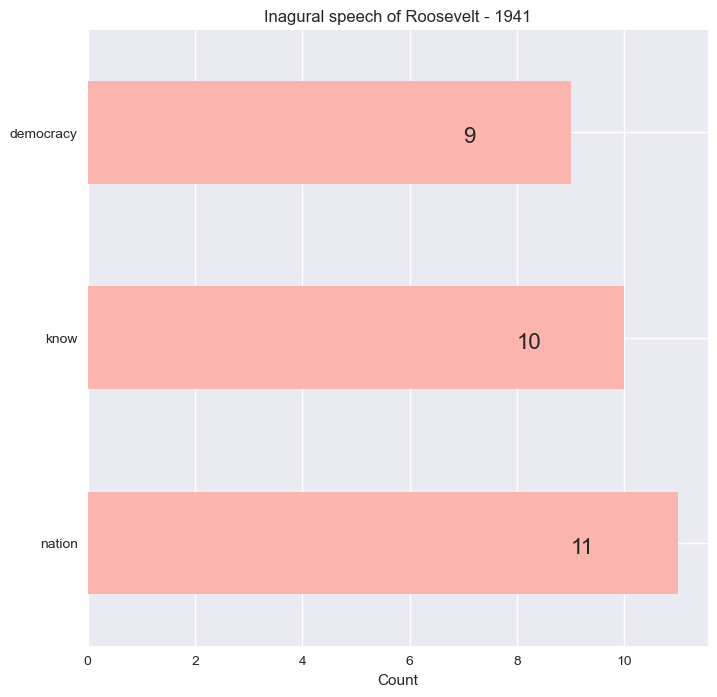

In [191]:
plt.figure(figsize=(8,8))
ax = freq.plot(kind = 'barh', colormap = 'Pastel1')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')

for p in ax.patches:
    ax.annotate('{:.0f}'.format (p.get_width()),
               (p.get_width()-2,p.get_y()+.20),fontsize = 16)

In [192]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:3]
freq

let      16
us       12
sides     8
dtype: int64

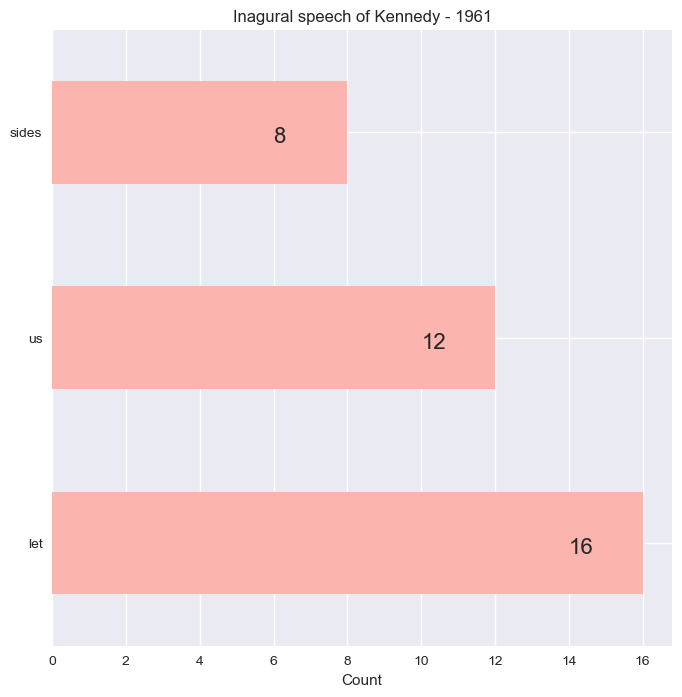

In [193]:
plt.figure(figsize=(8,8))
ax = freq.plot(kind = 'barh', colormap = 'Pastel1')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')

for p in ax.patches:
    ax.annotate('{:.0f}'.format (p.get_width()),
               (p.get_width()-2,p.get_y()+.20),fontsize = 16)

In [194]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:3]
freq

us       26
let      22
peace    19
dtype: int64

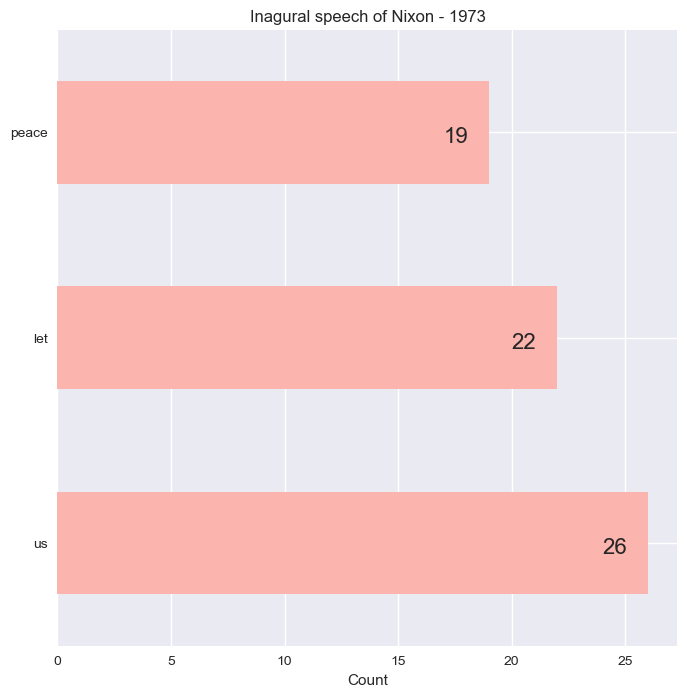

In [195]:
plt.figure(figsize=(8,8))
ax = freq.plot(kind = 'barh', colormap = 'Pastel1')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')

for p in ax.patches:
    ax.annotate('{:.0f}'.format (p.get_width()),
               (p.get_width()-2,p.get_y()+.20),fontsize = 16)

### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Roosevelt after cleaning


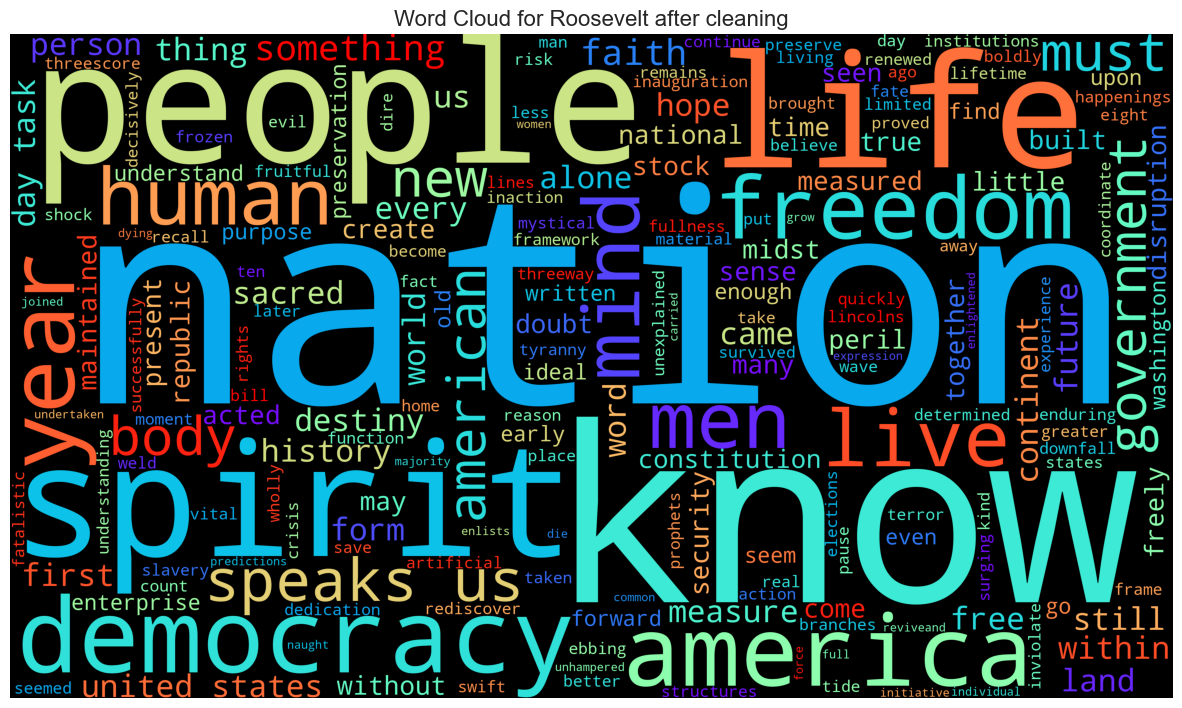

In [196]:

from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     colormap='rainbow',
                     width = 3500,
                     height = 2000).generate(words)

plt.figure(1,figsize=(15,15))
plt.title('Word Cloud for Roosevelt after cleaning', fontsize = 16)
print('Word Cloud for Roosevelt after cleaning')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


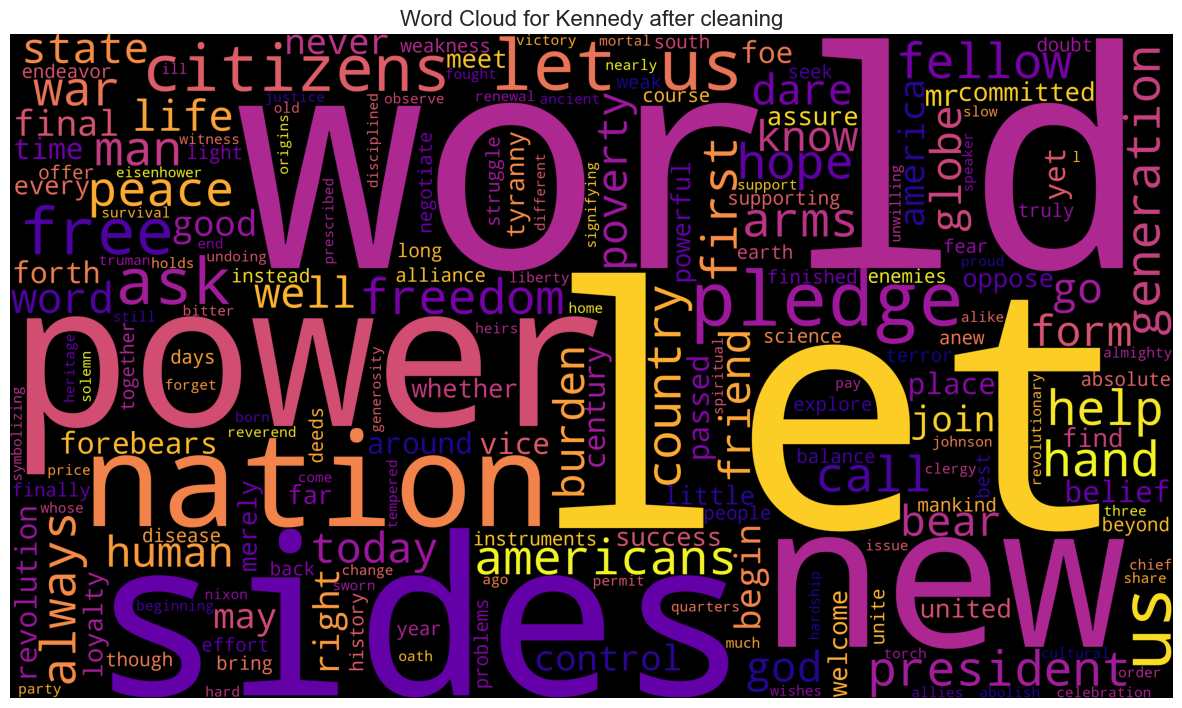

In [197]:

words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     colormap='plasma',
                     width = 3500,
                     height = 2000).generate(words)

plt.figure(1,figsize=(15,15))
plt.title('Word Cloud for Kennedy after cleaning', fontsize = 16)
print('Word Cloud for Kennedy after cleaning')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


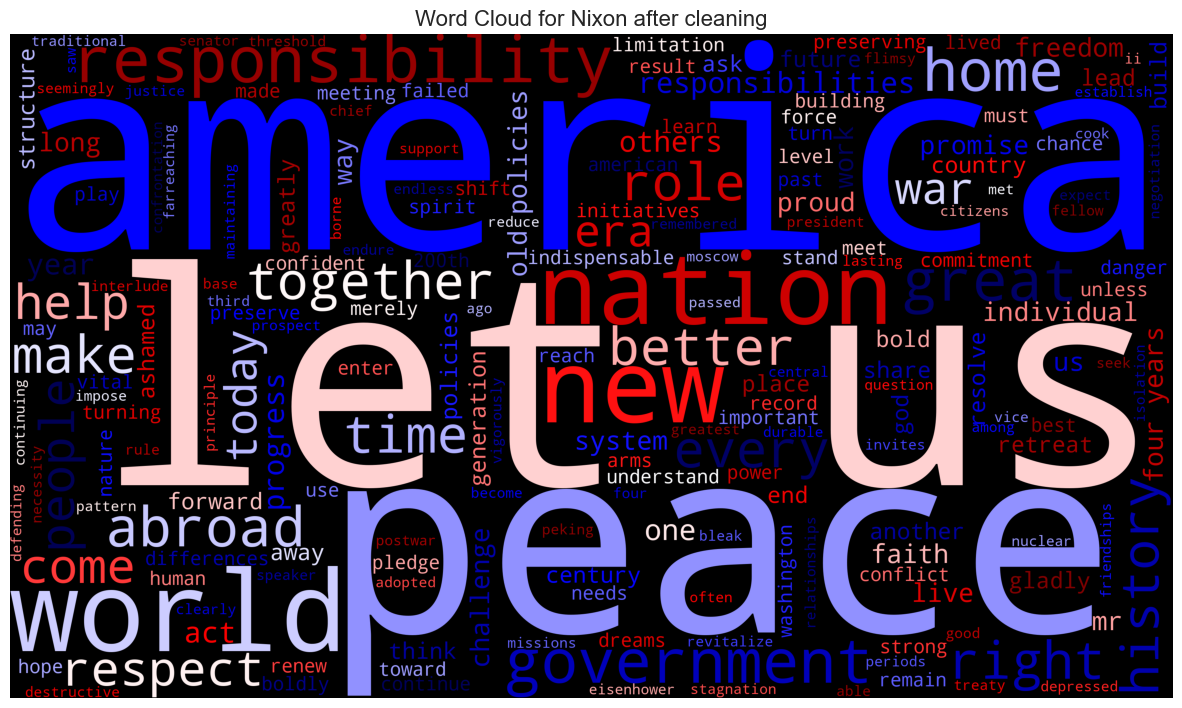

In [198]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     colormap='seismic_r',
                     width = 3500,
                     height = 2000).generate(words)

plt.figure(1,figsize=(15,15))
plt.title('Word Cloud for Nixon after cleaning', fontsize = 16)
print('Word Cloud for Nixon after cleaning')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()